# HO CHI MINH CITY vs HANOI:
## which is the best place to visit for food-lovers?
**_ Author: Quang Phong _**  

_ Capstone Project - The Battle of the Neighborhoods _

## TABLE OF CONTENTS
- [Problem Description](#introduction)
- [Data Source](#data)
- [Methodology](#methodology)
- [Import and Clean Data](#clean)
- [Data Analysis](#analysis)
- [Results and Discussion](#discussion)
- [Conclusion](#conclusion)

## PROBLEM DESCRIPTION <a name='introduction'/></a>


Tourism has developed to a significant extent recently. Among different regions in the world, South East Asian countries have proved to become promising destinations for travelers, and Vietnam is not an exception. Located in the center of the region, Vietnam is a country of various natural wonders, different cultural heritages, and numerous man-made landmarks. Among its attractions, Hanoi (Vietnam’s capital city) and Ho Chi Minh City (the country’s biggest city) are recognized as the two most popular choices to visit.

The 2 biggest cities not only in Vietnam but also in Indochina Peninsular, namely Ho Chi Minh City and Hanoi, have always made foreign travelers and even domestic ones indecisive to select the more suitable city to visit. The S-shaped country is narrow but long, which means the distance between the two biggest cities is large. For travelers with a limited time budget, visiting one city per travelling is virtually the only option. Therefore, they will benefit from understanding the similarities and differences between the two cities.   

Representing (and sharing) the viewpoints of "young food addicts" who always hunger for more and more good food on their journeys, the author will compare and contrast Ho Chi Minh City (Thành phố Hồ Chí Minh, in Vietnamese) and Hanoi (Hà Nội, in Vietnamese) with regards to food-related aspects to give some hints to their decisions. As mentioned, the main target audience is travelers who desire to come to Vietnam. More importantly, this can be used by investors and business owners to expand their market in either of the 2 cities based on understanding the gaps.


1/ What are the most common venues in each city?  
2/ What are the most common restaurants in each city?  
3/ What are the most common venues in each district?  
4/ What are the most common restaurants in each district?  
5/ What are the most common restaurants in each ward?  
6/ How many clusters can we categorize districts within each city based on restaurant-related venues?  
7/ How diverse are each district's restaurants in terms of cuisines?  
8/ How diverse are each city's restaurants in terms of cuisine??  
9/ Which city has a higher number of restaurants per residents?  

Also, the author visualizes all information on the map to have a clearer look at the results..

## DATA SOURCE <a name="data"></a>

There are 3 sources of data used in this project. 

The first data source, where data on administrative units of Ho Chi Minh City and Hanoi are scraped, is from https://www.citypopulation.de. In details, data on Ho Chi Minh City Municipality, Districts and Communes' names, levels, and populations is taken from https://www.citypopulation.de/en/vietnam/thanhphohochiminh/admin/. The similar data of Hanoi is taken from https://www.citypopulation.de/en/vietnam/hanoi/admin/. The data consists of name of units, their levels, and their populations. For the sake of simplicity and feasibility, the scope of this project covers 19 urban districts (and their wards) of HCMC and excludes 5 remaining rural districts (and their child rural communes or townships). Similarly, only 13 urban districts (and their wards) in Hanoi are covered. It should be noted that the population census was taken on 01 April 2009.

Second, the coordinates of locations in HCMC and Hanoi are taken from OpenStreetMap via Nominatim API.  The latitudes and longitudes of the cities, their districts, and their wards are respectively gathered for using in this project. Due to certain reasons, some coordinates are not correct, and will be replaced manually by the author.

Third, information about venues is taken from Foursquare. In details, the names, and categories of venues in HCMC and Hanoi will be gathered through the API provided by Foursquare.


## METHODOLOGY <a name="methodology"></a>

1. The data on population of administrative units of Ho Chi Minh City and Hanoi is scrapped respectively before being cleaned and transformed with the support of Pandas, Unidecode libraries.
2. The coordinates of the districts are gathered before being merged to the existing dataframes with the support of geopy.geocoders.Nominatim.
3. Foursquare API is used to explore the venues in each district.
4. The data exploration is conducted for 2 cities to answer all of the questions mentioned in the problem description.
5. K-means clustering is applied to see if there is any cluster of district in terms of restaurants so that travellers can make better plans to explore cuisines with the support of ScikitLearn.
6. Matplotlib and Folium is used to visualize the charts.

## IMPORT LIBRARIES

In [166]:
pip install geopy

In [167]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [168]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

Libraries imported.


## IMPORT AND CLEAN DATA <a name="clean"></a>

** Data on administrative units of HCMC is scaped from website www.citypopulation.de **  
- The data consists of name of units, their levels, and their populations.  
- For the sake of simplicity, the scope of this project covers 19 urban districts (and their child wards) of HCMC and excludes 5 remaining rural districts (and their child rural communes or townships).
- The population census was taken in 01 April 2009

In [169]:
df = pd.read_html('https://www.citypopulation.de/en/vietnam/thanhphohochiminh/admin/')[0]
df.head(10)

,Name,Status,PopulationCensus2009-04-01,Unnamed: 3
0,Bình Chánh,District,420109,→
1,An Phú Tây,Rural Commune,10094,→
2,Bình Chánh,Rural Commune,20466,→
3,Bình Hưng,Rural Commune,61349,→
4,Bình Lợi,Rural Commune,8611,→
5,Đa Phước,Rural Commune,15974,→
6,Hưng Long,Rural Commune,17345,→
7,Lê Minh Xuân,Rural Commune,31348,→
8,Phạm Văn Hai,Rural Commune,20442,→
9,Phong Phú,Rural Commune,21758,→


In [170]:
df.shape

(347, 4)

In [171]:
df = df.drop('Unnamed: 3', axis=1)
df.head()

,Name,Status,PopulationCensus2009-04-01
0,Bình Chánh,District,420109
1,An Phú Tây,Rural Commune,10094
2,Bình Chánh,Rural Commune,20466
3,Bình Hưng,Rural Commune,61349
4,Bình Lợi,Rural Commune,8611


In [172]:
df = df.rename(columns={'PopulationCensus2009-04-01': 'Population'})
df.head()

,Name,Status,Population
0,Bình Chánh,District,420109
1,An Phú Tây,Rural Commune,10094
2,Bình Chánh,Rural Commune,20466
3,Bình Hưng,Rural Commune,61349
4,Bình Lợi,Rural Commune,8611


In [173]:
df = df.set_index("Status")
df = df.drop(["District", "Rural Commune", "Township"], axis=0)

In [174]:
df = df.reset_index()
df.head()

,Status,Name,Population
0,Urban District,Bình Tân,572132
1,Ward,An Lạc,55686
2,Ward,An Lạc A,30973
3,Ward,Bình Hưng Hòa,57250
4,Ward,Bình Hưng Hoà A,98483


**Convert Vietnamese words (with 6 tones) to monotonal
 words (which is easier to read for English viewers and congruent with NinoNominatim and OpenStreetMap) **

In [175]:
from unidecode import unidecode
for i in range(len(df)):
    df.iloc[[i], [1]] = (unidecode(df.iloc[[i], [1]].to_string(header= False, index=False))).strip() #set header and index to False to get rid of these parts in the result of iloc
df.head()

,Status,Name,Population
0,Urban District,Binh Tan,572132
1,Ward,An Lac,55686
2,Ward,An Lac A,30973
3,Ward,Binh Hung Hoa,57250
4,Ward,Binh Hung Hoa A,98483


In [176]:
df

,Status,Name,Population
0,Urban District,Binh Tan,572132
1,Ward,An Lac,55686
2,Ward,An Lac A,30973
3,Ward,Binh Hung Hoa,57250
4,Ward,Binh Hung Hoa A,98483
5,Ward,Binh Hung Hoa B,48483
6,Ward,Binh Tri Dong,72802
7,Ward,Binh Tri Dong A,50102
8,Ward,Binh Tri Dong B,49246
9,Ward,Tan Tao,56554


** Adjust name of Districts and Wards so that OpenStreetMap API can find coordinates of locations **

In [177]:
df2 = df.copy(deep=True)
for i, status, name in zip(range(len(df2)), df2["Status"], df2["Name"]):
    if status == "Urban District":
        if name.startswith("Quan"):
            df2.iloc[[i],[1]] = "District " + name.lstrip("Quan ")
        else:
            df2.iloc[[i],[1]] = name + " District "
    if status == "Ward":
        if name.startswith("Phuong"):
            df2.iloc[[i],[1]] = "Ward " + name.lstrip("Phuong ")
        else:
            df2.iloc[[i],[1]] = name + " Ward"
df2

,Status,Name,Population
0,Urban District,Binh Tan District,572132
1,Ward,An Lac Ward,55686
2,Ward,An Lac A Ward,30973
3,Ward,Binh Hung Hoa Ward,57250
4,Ward,Binh Hung Hoa A Ward,98483
5,Ward,Binh Hung Hoa B Ward,48483
6,Ward,Binh Tri Dong Ward,72802
7,Ward,Binh Tri Dong A Ward,50102
8,Ward,Binh Tri Dong B Ward,49246
9,Ward,Tan Tao Ward,56554


** Create a district dataframe **

In [178]:
hcmc_dist_df = df2[df2["Status"]=="Urban District"].reset_index().drop("index", axis = 1)
hcmc_dist_df = hcmc_dist_df.rename(columns={"Name":"Full name"})
hcmc_dist_df

,Status,Full name,Population
0,Urban District,Binh Tan District,572132
1,Urban District,Binh Thanh District,457362
2,Urban District,Go Vap District,522690
3,Urban District,Phu Nhuan District,174535
4,Urban District,District 1,180225
5,Urban District,District 2,147490
6,Urban District,District 3,190553
7,Urban District,District 4,180980
8,Urban District,District 5,171452
9,Urban District,District 6,249329


** Create a ward dataframe **

In [179]:
full_name = []
for i, status, name in zip(range(len(df2)), df2["Status"], df2["Name"]):
    if status == "Urban District":
        current_district = name
        full_name.extend('0')
    if status == "Ward":
        full_name.append(name + " " + current_district)
full_name.append(0)
df2['Full name'] = full_name
df2

,Status,Name,Population,Full name
0,Urban District,Binh Tan District,572132,0
1,Ward,An Lac Ward,55686,An Lac Ward Binh Tan District
2,Ward,An Lac A Ward,30973,An Lac A Ward Binh Tan District
3,Ward,Binh Hung Hoa Ward,57250,Binh Hung Hoa Ward Binh Tan District
4,Ward,Binh Hung Hoa A Ward,98483,Binh Hung Hoa A Ward Binh Tan District
5,Ward,Binh Hung Hoa B Ward,48483,Binh Hung Hoa B Ward Binh Tan District
6,Ward,Binh Tri Dong Ward,72802,Binh Tri Dong Ward Binh Tan District
7,Ward,Binh Tri Dong A Ward,50102,Binh Tri Dong A Ward Binh Tan District
8,Ward,Binh Tri Dong B Ward,49246,Binh Tri Dong B Ward Binh Tan District
9,Ward,Tan Tao Ward,56554,Tan Tao Ward Binh Tan District


In [180]:
hcmc_ward_df = df2[df2["Status"]=="Ward"]
hcmc_ward_df

,Status,Name,Population,Full name
1,Ward,An Lac Ward,55686,An Lac Ward Binh Tan District
2,Ward,An Lac A Ward,30973,An Lac A Ward Binh Tan District
3,Ward,Binh Hung Hoa Ward,57250,Binh Hung Hoa Ward Binh Tan District
4,Ward,Binh Hung Hoa A Ward,98483,Binh Hung Hoa A Ward Binh Tan District
5,Ward,Binh Hung Hoa B Ward,48483,Binh Hung Hoa B Ward Binh Tan District
6,Ward,Binh Tri Dong Ward,72802,Binh Tri Dong Ward Binh Tan District
7,Ward,Binh Tri Dong A Ward,50102,Binh Tri Dong A Ward Binh Tan District
8,Ward,Binh Tri Dong B Ward,49246,Binh Tri Dong B Ward Binh Tan District
9,Ward,Tan Tao Ward,56554,Tan Tao Ward Binh Tan District
10,Ward,Tan Tao A Ward,52553,Tan Tao A Ward Binh Tan District


In [181]:
def findcoor(full_name):
    try:
        address = full_name + " Ho Chi Minh City Vietnam"
        geolocator = Nominatim(user_agent="hcmc")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        return(latitude, longitude)
    except:
        return(0,0)

** Assign latitude and longitude values to district dataframe ** 

In [182]:
coor = [findcoor(full_name) for full_name in hcmc_dist_df["Full name"].tolist()]
hcmc_dist_coor_df = pd.DataFrame(coor, columns=["Latitude", "Longitude"])

hcmc_dist_df["Latitude"] = hcmc_dist_coor_df["Latitude"]
hcmc_dist_df["Longitude"] = hcmc_dist_coor_df["Longitude"]

hcmc_dist_df

,Status,Full name,Population,Latitude,Longitude
0,Urban District,Binh Tan District,572132,10.749809,106.605664
1,Urban District,Binh Thanh District,457362,10.804659,106.707848
2,Urban District,Go Vap District,522690,10.840150,106.671083
3,Urban District,Phu Nhuan District,174535,10.800118,106.677042
4,Urban District,District 1,180225,10.774540,106.699184
5,Urban District,District 2,147490,10.791116,106.736729
6,Urban District,District 3,190553,10.783529,106.687098
7,Urban District,District 4,180980,10.759243,106.704890
8,Urban District,District 5,171452,10.756129,106.670376
9,Urban District,District 6,249329,10.746928,106.634495


** Also we notice that the coordinates of Tan Phu District is wrong, so the exact ones are manually assigned. **

In [183]:
hcmc_dist_df.loc[17, "Latitude"] = 10.7916403
hcmc_dist_df.loc[17, "Longitude"] = 106.6273015
hcmc_dist_df

,Status,Full name,Population,Latitude,Longitude
0,Urban District,Binh Tan District,572132,10.749809,106.605664
1,Urban District,Binh Thanh District,457362,10.804659,106.707848
2,Urban District,Go Vap District,522690,10.840150,106.671083
3,Urban District,Phu Nhuan District,174535,10.800118,106.677042
4,Urban District,District 1,180225,10.774540,106.699184
5,Urban District,District 2,147490,10.791116,106.736729
6,Urban District,District 3,190553,10.783529,106.687098
7,Urban District,District 4,180980,10.759243,106.704890
8,Urban District,District 5,171452,10.756129,106.670376
9,Urban District,District 6,249329,10.746928,106.634495


** As for wards, let's eliminate wards in Go Vap District, Tan Binh District, District 12, District 7, District because through different trials and attempts, these districts' wards' coordinates appear to not be provided by OpenStreetMap. **

In [184]:
hcmc_ward_df2 = hcmc_ward_df[hcmc_ward_df["Full name"].str.endswith("Go Vap District ")==False]
hcmc_ward_df2 = hcmc_ward_df2[hcmc_ward_df["Full name"].str.endswith("Tan Binh District ")==False]
hcmc_ward_df2 = hcmc_ward_df2[hcmc_ward_df["Full name"].str.endswith("District 2")==False]
hcmc_ward_df2 = hcmc_ward_df2[hcmc_ward_df["Full name"].str.endswith("District 7")==False]
hcmc_ward_df2 = hcmc_ward_df2[hcmc_ward_df["Full name"].str.endswith("District 9")==False]
hcmc_ward_df2 = hcmc_ward_df2[hcmc_ward_df["Full name"].str.endswith("District 12")==False].reset_index()

In [185]:
hcmc_ward_df2 = hcmc_ward_df2.drop('index',axis=1)
hcmc_ward_df2

,Status,Name,Population,Full name
0,Ward,An Lac Ward,55686,An Lac Ward Binh Tan District
1,Ward,An Lac A Ward,30973,An Lac A Ward Binh Tan District
2,Ward,Binh Hung Hoa Ward,57250,Binh Hung Hoa Ward Binh Tan District
3,Ward,Binh Hung Hoa A Ward,98483,Binh Hung Hoa A Ward Binh Tan District
4,Ward,Binh Hung Hoa B Ward,48483,Binh Hung Hoa B Ward Binh Tan District
5,Ward,Binh Tri Dong Ward,72802,Binh Tri Dong Ward Binh Tan District
6,Ward,Binh Tri Dong A Ward,50102,Binh Tri Dong A Ward Binh Tan District
7,Ward,Binh Tri Dong B Ward,49246,Binh Tri Dong B Ward Binh Tan District
8,Ward,Tan Tao Ward,56554,Tan Tao Ward Binh Tan District
9,Ward,Tan Tao A Ward,52553,Tan Tao A Ward Binh Tan District


** Assign latitude and longitude values to ward dataframe ** 

In [186]:
coor2 = [findcoor(full_name) for full_name in hcmc_ward_df2["Full name"].tolist()]
coor2

hcmc_ward_coor_df = pd.DataFrame(coor2, columns=["Latitude", "Longitude"])

hcmc_ward_df2["Latitude"] = hcmc_ward_coor_df["Latitude"]
hcmc_ward_df2["Longitude"] = hcmc_ward_coor_df["Longitude"]

hcmc_ward_df2

,Status,Name,Population,Full name,Latitude,Longitude
0,Ward,An Lac Ward,55686,An Lac Ward Binh Tan District,10.723415,106.615762
1,Ward,An Lac A Ward,30973,An Lac A Ward Binh Tan District,10.751050,106.622053
2,Ward,Binh Hung Hoa Ward,57250,Binh Hung Hoa Ward Binh Tan District,10.801901,106.604118
3,Ward,Binh Hung Hoa A Ward,98483,Binh Hung Hoa A Ward Binh Tan District,10.784009,106.610371
4,Ward,Binh Hung Hoa B Ward,48483,Binh Hung Hoa B Ward Binh Tan District,10.813976,106.594204
5,Ward,Binh Tri Dong Ward,72802,Binh Tri Dong Ward Binh Tan District,10.763901,106.618204
6,Ward,Binh Tri Dong A Ward,50102,Binh Tri Dong A Ward Binh Tan District,10.758022,106.609167
7,Ward,Binh Tri Dong B Ward,49246,Binh Tri Dong B Ward Binh Tan District,10.748754,106.611218
8,Ward,Tan Tao Ward,56554,Tan Tao Ward Binh Tan District,10.760312,106.588818
9,Ward,Tan Tao A Ward,52553,Tan Tao A Ward Binh Tan District,10.745235,106.585235


In [187]:
hcmc_ward_final_df = hcmc_ward_df2[hcmc_ward_df2["Latitude"]!=0].reset_index().drop("index", axis=1)
hcmc_ward_final_df

,Status,Name,Population,Full name,Latitude,Longitude
0,Ward,An Lac Ward,55686,An Lac Ward Binh Tan District,10.723415,106.615762
1,Ward,An Lac A Ward,30973,An Lac A Ward Binh Tan District,10.751050,106.622053
2,Ward,Binh Hung Hoa Ward,57250,Binh Hung Hoa Ward Binh Tan District,10.801901,106.604118
3,Ward,Binh Hung Hoa A Ward,98483,Binh Hung Hoa A Ward Binh Tan District,10.784009,106.610371
4,Ward,Binh Hung Hoa B Ward,48483,Binh Hung Hoa B Ward Binh Tan District,10.813976,106.594204
5,Ward,Binh Tri Dong Ward,72802,Binh Tri Dong Ward Binh Tan District,10.763901,106.618204
6,Ward,Binh Tri Dong A Ward,50102,Binh Tri Dong A Ward Binh Tan District,10.758022,106.609167
7,Ward,Binh Tri Dong B Ward,49246,Binh Tri Dong B Ward Binh Tan District,10.748754,106.611218
8,Ward,Tan Tao Ward,56554,Tan Tao Ward Binh Tan District,10.760312,106.588818
9,Ward,Tan Tao A Ward,52553,Tan Tao A Ward Binh Tan District,10.745235,106.585235


### Let's implemment all the similar procedures for Hanoi. ###

In [188]:
dfh = pd.read_html('https://www.citypopulation.de/en/vietnam/hanoi/admin/')[0]
dfh.head(10)

,Name,Status,PopulationCensus2009-04-01,Unnamed: 3
0,Bắc Từ Liêm,Urban District,222972,→
1,Cổ Nhuế,Ward,58554,→
2,Đông Ngạc,Ward,31577,→
3,Liên Mạc,Ward,8221,→
4,Minh Khai,Ward,25689,→
5,Phú Diễn,Ward,30312,→
6,Tây Tựu,Ward,17412,→
7,Thượng Cát,Ward,7626,→
8,Thụy Phương,Ward,10678,→
9,Xuân Đỉnh,Ward,32903,→


In [189]:
dfh.shape

(608, 4)

In [190]:
dfh = dfh.drop('Unnamed: 3', axis=1)
dfh.head()

,Name,Status,PopulationCensus2009-04-01
0,Bắc Từ Liêm,Urban District,222972
1,Cổ Nhuế,Ward,58554
2,Đông Ngạc,Ward,31577
3,Liên Mạc,Ward,8221
4,Minh Khai,Ward,25689


In [191]:
dfh = dfh.rename(columns={'PopulationCensus2009-04-01': 'Population'})
dfh.head()

,Name,Status,Population
0,Bắc Từ Liêm,Urban District,222972
1,Cổ Nhuế,Ward,58554
2,Đông Ngạc,Ward,31577
3,Liên Mạc,Ward,8221
4,Minh Khai,Ward,25689


In [192]:
dfh = dfh.set_index("Status")
dfh = dfh.drop(["District", "Rural Commune", "Township"], axis=0)

In [193]:
dfh = dfh.reset_index()
dfh.head()

,Status,Name,Population
0,Urban District,Bắc Từ Liêm,222972
1,Ward,Cổ Nhuế,58554
2,Ward,Đông Ngạc,31577
3,Ward,Liên Mạc,8221
4,Ward,Minh Khai,25689


In [194]:
for i in range(len(dfh)):
    dfh.iloc[[i], [1]] = (unidecode(dfh.iloc[[i], [1]].to_string(header= False, index=False))).strip() #set header and index to False to get rid of these parts in the result of iloc
dfh.head()

,Status,Name,Population
0,Urban District,Bac Tu Liem,222972
1,Ward,Co Nhue,58554
2,Ward,Dong Ngac,31577
3,Ward,Lien Mac,8221
4,Ward,Minh Khai,25689


In [195]:
dfh

,Status,Name,Population
0,Urban District,Bac Tu Liem,222972
1,Ward,Co Nhue,58554
2,Ward,Dong Ngac,31577
3,Ward,Lien Mac,8221
4,Ward,Minh Khai,25689
5,Ward,Phu Dien,30312
6,Ward,Tay Tuu,17412
7,Ward,Thuong Cat,7626
8,Ward,Thuy Phuong,10678
9,Ward,Xuan Dinh,32903


In [196]:
dfh2 = dfh.copy(deep=True)
for i, status, name in zip(range(len(dfh2)), dfh2["Status"], dfh2["Name"]):
    if status == "Urban District":
        dfh2.iloc[[i],[1]] = name + " District"

dfh2

,Status,Name,Population
0,Urban District,Bac Tu Liem District,222972
1,Ward,Co Nhue,58554
2,Ward,Dong Ngac,31577
3,Ward,Lien Mac,8221
4,Ward,Minh Khai,25689
5,Ward,Phu Dien,30312
6,Ward,Tay Tuu,17412
7,Ward,Thuong Cat,7626
8,Ward,Thuy Phuong,10678
9,Ward,Xuan Dinh,32903


In [197]:
hn_dist_df = dfh2[dfh2["Status"].isin(["Urban District", "District-level Town"])].reset_index().drop("index", axis = 1)
hn_dist_df = hn_dist_df.rename(columns={"Name":"Full name"})
hn_dist_df

,Status,Full name,Population
0,Urban District,Bac Tu Liem District,222972
1,Urban District,Ba Dinh District,225910
2,Urban District,Cau Giay District,225643
3,Urban District,Dong Da District,370117
4,Urban District,Ha Dong District,233136
5,Urban District,Hai Ba Trung District,295726
6,Urban District,Hoang Mai District,335509
7,Urban District,Hoan Kiem District,147334
8,Urban District,Long Bien District,226913
9,Urban District,Nam Tu Liem District,169586


In [198]:
full_name_h = []
for i, status, name in zip(range(len(dfh2)), dfh2["Status"], dfh2["Name"]):
    if status == "Urban District" or status == "District-level Town":
        current_district_h = name
        full_name_h.extend('0')
    if status == "Ward":
        full_name_h.append(name + " " + current_district_h)
full_name_h.append(0)
dfh2['Full name'] = full_name_h
dfh2

,Status,Name,Population,Full name
0,Urban District,Bac Tu Liem District,222972,0
1,Ward,Co Nhue,58554,Co Nhue Bac Tu Liem District
2,Ward,Dong Ngac,31577,Dong Ngac Bac Tu Liem District
3,Ward,Lien Mac,8221,Lien Mac Bac Tu Liem District
4,Ward,Minh Khai,25689,Minh Khai Bac Tu Liem District
5,Ward,Phu Dien,30312,Phu Dien Bac Tu Liem District
6,Ward,Tay Tuu,17412,Tay Tuu Bac Tu Liem District
7,Ward,Thuong Cat,7626,Thuong Cat Bac Tu Liem District
8,Ward,Thuy Phuong,10678,Thuy Phuong Bac Tu Liem District
9,Ward,Xuan Dinh,32903,Xuan Dinh Bac Tu Liem District


In [199]:
hn_ward_df = dfh2[dfh2["Status"]=="Ward"].reset_index().drop("index", axis = 1)
hn_ward_df

,Status,Name,Population,Full name
0,Ward,Co Nhue,58554,Co Nhue Bac Tu Liem District
1,Ward,Dong Ngac,31577,Dong Ngac Bac Tu Liem District
2,Ward,Lien Mac,8221,Lien Mac Bac Tu Liem District
3,Ward,Minh Khai,25689,Minh Khai Bac Tu Liem District
4,Ward,Phu Dien,30312,Phu Dien Bac Tu Liem District
5,Ward,Tay Tuu,17412,Tay Tuu Bac Tu Liem District
6,Ward,Thuong Cat,7626,Thuong Cat Bac Tu Liem District
7,Ward,Thuy Phuong,10678,Thuy Phuong Bac Tu Liem District
8,Ward,Xuan Dinh,32903,Xuan Dinh Bac Tu Liem District
9,Ward,Cong Vi,15866,Cong Vi Ba Dinh District


In [200]:
def findcoor2(full_name):
    try:
        address = full_name + " Hanoi Vietnam"
        geolocator = Nominatim(user_agent="hanoi")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        return(latitude, longitude)
    except:
        return(0,0)

In [201]:
coor_h = [findcoor2(full_name) for full_name in hn_dist_df["Full name"].tolist()]
hn_dist_coor_df = pd.DataFrame(coor_h, columns=["Latitude", "Longitude"])

hn_dist_df["Latitude"] = hn_dist_coor_df["Latitude"]
hn_dist_df["Longitude"] = hn_dist_coor_df["Longitude"]

hn_dist_df

,Status,Full name,Population,Latitude,Longitude
0,Urban District,Bac Tu Liem District,222972,21.069861,105.757339
1,Urban District,Ba Dinh District,225910,21.035549,105.824840
2,Urban District,Cau Giay District,225643,21.027277,105.791464
3,Urban District,Dong Da District,370117,21.012920,105.827196
4,Urban District,Ha Dong District,233136,20.952443,105.760955
5,Urban District,Hai Ba Trung District,295726,21.005970,105.857484
6,Urban District,Hoang Mai District,335509,20.974598,105.863707
7,Urban District,Hoan Kiem District,147334,21.028524,105.850716
8,Urban District,Long Bien District,226913,21.037154,105.897839
9,Urban District,Nam Tu Liem District,169586,21.012846,105.760874


In [202]:
coor_h2 = [findcoor2(full_name) for full_name in hn_ward_df["Full name"].tolist()]
hn_ward_coor_df = pd.DataFrame(coor_h2, columns=["Latitude", "Longitude"])

hn_ward_df["Latitude"] = hn_ward_coor_df["Latitude"]
hn_ward_df["Longitude"] = hn_ward_coor_df["Longitude"]

hn_ward_df

,Status,Name,Population,Full name,Latitude,Longitude
0,Ward,Co Nhue,58554,Co Nhue Bac Tu Liem District,0.000000,0.000000
1,Ward,Dong Ngac,31577,Dong Ngac Bac Tu Liem District,0.000000,0.000000
2,Ward,Lien Mac,8221,Lien Mac Bac Tu Liem District,0.000000,0.000000
3,Ward,Minh Khai,25689,Minh Khai Bac Tu Liem District,21.047964,105.744800
4,Ward,Phu Dien,30312,Phu Dien Bac Tu Liem District,21.043940,105.755260
5,Ward,Tay Tuu,17412,Tay Tuu Bac Tu Liem District,0.000000,0.000000
6,Ward,Thuong Cat,7626,Thuong Cat Bac Tu Liem District,21.129922,105.693063
7,Ward,Thuy Phuong,10678,Thuy Phuong Bac Tu Liem District,0.000000,0.000000
8,Ward,Xuan Dinh,32903,Xuan Dinh Bac Tu Liem District,0.000000,0.000000
9,Ward,Cong Vi,15866,Cong Vi Ba Dinh District,21.035670,105.810235


In [203]:
hn_ward_final_df = hn_ward_df[hn_ward_df["Latitude"]!=0].reset_index().drop("index", axis=1)
hn_ward_final_df

,Status,Name,Population,Full name,Latitude,Longitude
0,Ward,Minh Khai,25689,Minh Khai Bac Tu Liem District,21.047964,105.744800
1,Ward,Phu Dien,30312,Phu Dien Bac Tu Liem District,21.043940,105.755260
2,Ward,Thuong Cat,7626,Thuong Cat Bac Tu Liem District,21.129922,105.693063
3,Ward,Cong Vi,15866,Cong Vi Ba Dinh District,21.035670,105.810235
4,Ward,Dien Bien,9905,Dien Bien Ba Dinh District,21.030667,105.838351
5,Ward,Giang Vo,17730,Giang Vo Ba Dinh District,21.028913,105.821193
6,Ward,Kim Ma,15272,Kim Ma Ba Dinh District,21.031279,105.826369
7,Ward,Lieu Giai,21007,Lieu Giai Ba Dinh District,21.037468,105.817602
8,Ward,Ngoc Ha,19430,Ngoc Ha Ba Dinh District,21.037107,105.825912
9,Ward,Ngoc Khanh,20072,Ngoc Khanh Ba Dinh District,21.029429,105.811065


## DATA ANALYSIS <a name="analysis"></a>

** Get the coordinate of Ho Chi Minh city and plot the map** 

In [204]:
[hcm_lat, hcm_long] = findcoor("")
print('The geograpical coordinate of Ho Chi Minh City are {}, {}.'.format(hcm_lat, hcm_long))


The geograpical coordinate of Ho Chi Minh City are 10.7758439, 106.7017555.


In [205]:
map_hcm = folium.Map(location=[hcm_lat, hcm_long], zoom_start=12)
for lat, lng, dis in zip(hcmc_dist_df['Latitude'], hcmc_dist_df['Longitude'], hcmc_dist_df['Full name']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#960018',
        fill=True,
        fill_color='#960018',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcm)  

map_hcm

** Get the coordinate of Hanoi and plot the map **

In [206]:
[hn_lat, hn_long] = findcoor2("")
print('The geograpical coordinate of hanoi are {}, {}.'.format(hn_lat, hn_long))


The geograpical coordinate of hanoi are 21.0294498, 105.8544441.


In [207]:
map_hn = folium.Map(location=[hn_lat, hn_long], zoom_start=12)
for lat, lng, dis in zip(hn_dist_df['Latitude'], hn_dist_df['Longitude'], hn_dist_df['Full name']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hn)  

map_hn

** Define Foursquare Credentials and Version **

In [208]:

CLIENT_ID = '4HDFETJYKE1IBEUXJPPS1DLQ2FAU2KRGA5G3B3CCVBK34SFA' # my Foursquare ID
CLIENT_SECRET = 'QIWRFSWPOE31DSQ4A0O4QWKKZJNKP4IMIBOM4RYCNGX40HKR' # my Foursquare Secret
VERSION = '20181111' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4HDFETJYKE1IBEUXJPPS1DLQ2FAU2KRGA5G3B3CCVBK34SFA
CLIENT_SECRET:QIWRFSWPOE31DSQ4A0O4QWKKZJNKP4IMIBOM4RYCNGX40HKR


** Explore the venues in HCMC **

In [209]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

        print(name)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [210]:
hcmc_venues = getNearbyVenues(names=hcmc_dist_df['Full name'],
                                   latitudes=hcmc_dist_df['Latitude'],
                                   longitudes=hcmc_dist_df['Longitude']
                                  )

Binh Tan District 
Binh Thanh District 
Go Vap District 
Phu Nhuan District 
District 1
District 2
District 3
District 4
District 5
District 6
District 7
District 8
District 9
District 10
District 11
District 12
Tan Binh District 
Tan Phu District 
Thu Duc District 


In [211]:
print(hcmc_venues.shape)
hcmc_venues

(1120, 7)


,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binh Tan District,10.749809,106.605664,AEON Mall Bình Tân,10.742904,106.611836,Shopping Mall
1,Binh Tan District,10.749809,106.605664,Co.opMart,10.753321,106.613401,Shopping Mall
2,Binh Tan District,10.749809,106.605664,Coffee Bui Van Ngo,10.751648,106.612534,Café
3,Binh Tan District,10.749809,106.605664,Mocca Coffee Lounge,10.748529,106.616362,Coffee Shop
4,Binh Tan District,10.749809,106.605664,CGV Cinemas AEON Bình Tân,10.742998,106.612741,Multiplex
5,Binh Tan District,10.749809,106.605664,"547 kinh duong vuong, binh tan",10.735678,106.614160,Fabric Shop
6,Binh Tan District,10.749809,106.605664,Phúc Long Coffee & Tea House,10.743364,106.612422,Coffee Shop
7,Binh Tan District,10.749809,106.605664,Thủy Mộc Miên Cafe,10.753701,106.610489,Café
8,Binh Tan District,10.749809,106.605664,Bún bò Huế NGON RỨA HÈ,10.751811,106.614512,Vietnamese Restaurant
9,Binh Tan District,10.749809,106.605664,KOI Thé AEON Mall Bình Tân,10.743681,106.612530,Bubble Tea Shop


In [212]:
hcmc_venues_group=hcmc_venues.groupby('District').count().reset_index()
hcmc_venues_group

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binh Tan District,16,16,16,16,16,16
1,Binh Thanh District,99,99,99,99,99,99
2,District 1,100,100,100,100,100,100
3,District 10,100,100,100,100,100,100
4,District 11,53,53,53,53,53,53
5,District 12,1,1,1,1,1,1
6,District 2,78,78,78,78,78,78
7,District 3,100,100,100,100,100,100
8,District 4,100,100,100,100,100,100
9,District 5,100,100,100,100,100,100


In [213]:
print('In above table, there are {} uniques categories.'.format(len(hcmc_venues['Venue Category'].unique())))

In above table, there are 132 uniques categories.


In [214]:
hcmc_venues['Venue Category'].unique()

array(['Shopping Mall', 'Café', 'Coffee Shop', 'Multiplex', 'Fabric Shop',
       'Vietnamese Restaurant', 'Bubble Tea Shop', 'Fast Food Restaurant',
       'Asian Restaurant', 'Bookstore', 'Japanese Restaurant',
       'Travel Agency', 'Convention Center', 'Sushi Restaurant',
       'Chinese Restaurant', 'German Restaurant', 'Seafood Restaurant',
       'Juice Bar', 'BBQ Joint', 'Bar', 'Vegetarian / Vegan Restaurant',
       'Dessert Shop', 'French Restaurant', 'Russian Restaurant',
       'Steakhouse', 'Park', 'Museum', 'Spa', 'Diner', 'Breakfast Spot',
       'Dive Bar', 'Restaurant', 'Gym / Fitness Center', 'Building',
       'Furniture / Home Store', 'Noodle House', 'Thai Restaurant',
       'Massage Studio', 'Flea Market', 'Zoo', 'Food', 'History Museum',
       'Food Truck', 'Gym', 'Warehouse Store', 'Pizza Place', 'Boutique',
       'Market', 'Supermarket', 'Lounge', 'Food Court', 'Hotel',
       'Cantonese Restaurant', 'Snack Place', 'Beer Garden',
       'Outdoors & Recreatio

<function matplotlib.pyplot.show(close=None, block=None)>

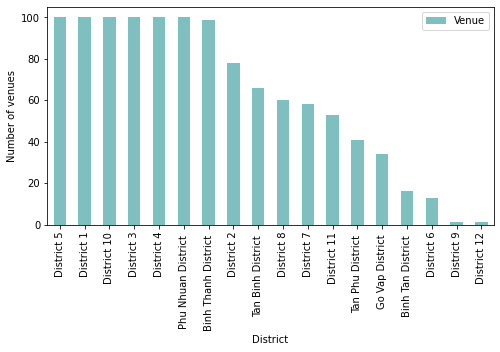

In [215]:
import matplotlib.pyplot as plt
ax = hcmc_venues_group.sort_values(by="Venue", ascending=False).plot(x="District", y="Venue", kind="bar", figsize=(8,4), color="teal", alpha=0.5)
ax.set_ylabel("Number of venues")
plt.show

** We notice District 12 and 9 do not have many venues taken from API, so we elimiate them. **

In [216]:
hcmc_venues2=hcmc_venues.set_index("District")
hcmc_venues2=hcmc_venues2.drop(index="District 12", axis=0)
hcmc_venues2=hcmc_venues2.drop(index="District 9", axis=0)
print(hcmc_venues2.shape)
hcmc_venues2.head()

(1118, 6)


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Binh Tan District,10.749809,106.605664,AEON Mall Bình Tân,10.742904,106.611836,Shopping Mall
Binh Tan District,10.749809,106.605664,Co.opMart,10.753321,106.613401,Shopping Mall
Binh Tan District,10.749809,106.605664,Coffee Bui Van Ngo,10.751648,106.612534,Café
Binh Tan District,10.749809,106.605664,Mocca Coffee Lounge,10.748529,106.616362,Coffee Shop
Binh Tan District,10.749809,106.605664,CGV Cinemas AEON Bình Tân,10.742998,106.612741,Multiplex


In [217]:
hcmc_venues_group2=hcmc_venues2.groupby('District').count().reset_index()
hcmc_venues_group2

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binh Tan District,16,16,16,16,16,16
1,Binh Thanh District,99,99,99,99,99,99
2,District 1,100,100,100,100,100,100
3,District 10,100,100,100,100,100,100
4,District 11,53,53,53,53,53,53
5,District 2,78,78,78,78,78,78
6,District 3,100,100,100,100,100,100
7,District 4,100,100,100,100,100,100
8,District 5,100,100,100,100,100,100
9,District 6,13,13,13,13,13,13


In [218]:
hcmc_venues2['Venue Category'].unique()[:20]

array(['Shopping Mall', 'Café', 'Coffee Shop', 'Multiplex', 'Fabric Shop',
       'Vietnamese Restaurant', 'Bubble Tea Shop', 'Fast Food Restaurant',
       'Asian Restaurant', 'Bookstore', 'Japanese Restaurant',
       'Travel Agency', 'Convention Center', 'Sushi Restaurant',
       'Chinese Restaurant', 'German Restaurant', 'Seafood Restaurant',
       'Juice Bar', 'BBQ Joint', 'Bar'], dtype=object)

In [219]:
hcmc_res_count1 = 0
hcmc_res_count2 = 0
hcmc_res_venue = []
for venue in hcmc_venues['Venue Category']:
    if "Restaurant" in venue:
        hcmc_res_count1 += 1
for venue in hcmc_venues['Venue Category'].unique():
    if "Restaurant" in venue:
        hcmc_res_count2 += 1
        hcmc_res_venue.append(venue)
print('The number of restaurants in HCMC is:', hcmc_res_count1,'\n')
print('The number of different type of restaurants in HCMC is:', hcmc_res_count2,'\n')
print('They are:')
for res in hcmc_res_venue:
    print(res, ":", hcmc_venues['Venue Category'][hcmc_venues['Venue Category']==res].count())




The number of restaurants in HCMC is: 412 

The number of different type of restaurants in HCMC is: 31 

They are:
Vietnamese Restaurant : 154
Fast Food Restaurant : 9
Asian Restaurant : 30
Japanese Restaurant : 19
Sushi Restaurant : 7
Chinese Restaurant : 34
German Restaurant : 3
Seafood Restaurant : 34
Vegetarian / Vegan Restaurant : 24
French Restaurant : 14
Russian Restaurant : 1
Restaurant : 13
Thai Restaurant : 8
Cantonese Restaurant : 4
Middle Eastern Restaurant : 6
Korean Restaurant : 4
Spanish Restaurant : 3
Italian Restaurant : 8
Tapas Restaurant : 2
North Indian Restaurant : 2
Mexican Restaurant : 4
Indian Restaurant : 5
Argentinian Restaurant : 1
Ramen Restaurant : 2
American Restaurant : 2
Mediterranean Restaurant : 2
Japanese Curry Restaurant : 1
Hotpot Restaurant : 2
Dim Sum Restaurant : 10
Dumpling Restaurant : 3
Udon Restaurant : 1


In [220]:
hcmc_pop = hcmc_dist_df[~hcmc_dist_df['Full name'].isin(['District 9', 'District 12', 'Thu Duc District'])]['Population'].sum()
print("The population of HCMC research districts is: ",hcmc_pop)


The population of HCMC research districts is:  5218998


In [221]:
print("The number of restaurants in HCMC per resident is 1 per", hcmc_pop/hcmc_res_count1)

The number of restaurants in HCMC per resident is 1 per 12667.470873786408


** Top 10 venues in each district of HCMC **

In [222]:
hcmc_venues2 = hcmc_venues2.reset_index()
hcmc_venues2.shape

(1118, 7)

In [223]:
# one hot encoding
hcmc_dist_onehot = pd.get_dummies(hcmc_venues2[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
hcmc_dist_onehot['District'] = hcmc_venues2['District'] 

# move district column to the first column
fixed_columns = [hcmc_dist_onehot.columns[-1]] + list(hcmc_dist_onehot.columns[:-1])
hcmc_dist_onehot = hcmc_dist_onehot[fixed_columns]

# group the rows by district and by taking the mean of the frequency of occurrence of each category
hcmc_dist_grouped = hcmc_dist_onehot.groupby('District').mean().reset_index()
print(hcmc_dist_grouped.shape)
hcmc_dist_grouped

(16, 133)


,District,Airport Lounge,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dumpling Restaurant,Electronics Store,Fabric Shop,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Park,Pizza Place,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theme Park,Travel Agency,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wings Joint,Yoga Studio,Zoo
0,Binh Tan District,0.000000,0.000000,0.00000,0.00,0.00,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.062500,0.000000,0.00000,0.000000,0.00,0.062500,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.00,0.00,0.125000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.125000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.062500,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.062500,0.000000,0.000000,0.00,0.000000,0.00,0.000000
1,Binh Thanh District,0.000000,0.000000,0.00000,0.00,0.00,0.060606,0.000000,0.020202,0.000000,0.010101,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010101,0.00,0.000000,0.000000,0.010101,0.000000,0.000000,0.181818,0.000000,0.020202,0.00,0.00,0.060606,0.000000,0.010101,0.00000,0.000000,0.000000,0.00,0.010101,0.000000,0.020202,0.010101,0.000000,0.000000,0.0000,0.000000,0.030303,0.00,0.010101,0.000000,0.010101,0.00,0.040404,0.000000,0.010101,0.000000,0.010101,0.00,0.000000,0.000000,0.010101,0.030303,0.010101,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.00,0.010101,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.010101,0.00,0.010101,0.00,0.00,0.00,0.010101,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020202,0.010101,0.000000,0.040404,0.00,0.010101,0.000000,0.000000,0.00,0.010101,0.00,0.00,0.000000,0.000000,0.010101,0.000000,0.000000,0.010101,0.00,0.00,0.000000,0.000000,0.000000,0.010101,0.000000,0.010101,0.00000,0.010101,0.151515,0.0000

In [224]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hcmc_dist_10 = pd.DataFrame(columns=columns)
hcmc_dist_10['District'] = hcmc_dist_grouped['District']

for ind in np.arange(hcmc_dist_grouped.shape[0]):
    hcmc_dist_10.iloc[ind, 1:] = return_most_common_venues(hcmc_dist_grouped.iloc[ind, :], num_top_venues)

hcmc_dist_10

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Binh Tan District,Café,Coffee Shop,Fast Food Restaurant,Shopping Mall,Bubble Tea Shop,Bookstore,Multiplex,Vietnamese Restaurant,Asian Restaurant,Japanese Restaurant
1,Binh Thanh District,Café,Vietnamese Restaurant,Asian Restaurant,Coffee Shop,French Restaurant,Seafood Restaurant,Multiplex,Gym / Fitness Center,Flea Market,Japanese Restaurant
2,District 1,Vietnamese Restaurant,Hotel,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Spa,Pizza Place,Massage Studio,Clothing Store
3,District 10,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Vegetarian / Vegan Restaurant,Dessert Shop,Steakhouse,Bookstore,Asian Restaurant,Seafood Restaurant
4,District 11,Café,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Asian Restaurant,Residential Building (Apartment / Condo),Dessert Shop,Gym,Coffee Shop
5,District 2,Café,Restaurant,Coffee Shop,French Restaurant,Bakery,BBQ Joint,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Mediterranean Restaurant
6,District 3,Vietnamese Restaurant,Hotel,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place,Spa,Massage Studio,Cocktail Bar,Breakfast Spot
7,District 4,Vietnamese Restaurant,Hotel,Café,Seafood Restaurant,Spa,Hostel,Food,Indian Restaurant,Noodle House,Sandwich Place
8,District 5,Vietnamese Restaurant,Chinese Restaurant,Café,Coffee Shop,Noodle House,Food Truck,Dessert Shop,Bookstore,Vegetarian / Vegan Restaurant,Asian Restaurant
9,District 6,Café,Supermarket,Movie Theater,Flea Market,Fast Food Restaurant,Market,Cantonese Restaurant,Asian Restaurant,Coffee Shop,Pizza Place


In [225]:
hcmc_dist_res_grouped = hcmc_dist_grouped[hcmc_res_venue].reset_index().drop("index", axis=1)
hcmc_dist_res_grouped["District"]=hcmc_dist_grouped["District"]
hcmc_dist_res_grouped=hcmc_dist_res_grouped.set_index("District").reset_index()
hcmc_dist_res_grouped

,District,Vietnamese Restaurant,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,German Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Russian Restaurant,Restaurant,Thai Restaurant,Cantonese Restaurant,Middle Eastern Restaurant,Korean Restaurant,Spanish Restaurant,Italian Restaurant,Tapas Restaurant,North Indian Restaurant,Mexican Restaurant,Indian Restaurant,Argentinian Restaurant,Ramen Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Curry Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Udon Restaurant
0,Binh Tan District,0.062500,0.125000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000
1,Binh Thanh District,0.151515,0.000000,0.060606,0.030303,0.010101,0.020202,0.010101,0.040404,0.010101,0.040404,0.010101,0.020202,0.010101,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000
2,District 1,0.100000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.040000,0.020000,0.000000,0.000000,0.020000,0.000000,0.010000,0.000000,0.01,0.030000,0.01,0.01,0.010000,0.010000,0.01,0.01000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000
3,District 10,0.220000,0.000000,0.030000,0.010000,0.010000,0.020000,0.000000,0.030000,0.040000,0.020000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.010000,0.00,0.00000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.00000
4,District 11,0.056604,0.018868,0.037736,0.000000,0.000000,0.169811,0.000000,0.094340,0.018868,0.000000,0.000000,0.000000,0.000000,0.037736,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.018868,0.018868,0.00000
5,District 2,0.038462,0.000000,0.038462,0.025641,0.000000,0.000000,0.000000,0.012821,0.012821,0.051282,0.000000,0.076923,0.025641,0.000000,0.000000,0.000000,0.00,0.012821,0.00,0.00,0.012821,0.000000,0.00,0.00000,0.025641,0.025641,0.012821,0.00,0.000000,0.000000,0.00000
6,District 3,0.150000,0.000000,0.020000,0.010000,0.010000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.020000,0.00,0.01,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000
7,District 4,0.100000,0.000000,0.000000,0.020000,0.010000,0.000000,0.010000,0.060000,0.020000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.01,0.010000,0.01,0.00,0.020000,0.020000,0.00,0.00000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.00000
8,District 5,0.150000,0.000000,0.030000,0.000000,0.010000,0.100000,0.000000,0.030000,0.030000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.020000,0.010000,0.00000
9,District 6,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000


In [226]:
def return_res_venues(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:10]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
hcmc_dist_res_10 = pd.DataFrame(columns=columns)
hcmc_dist_res_10['District'] = hcmc_dist_res_grouped['District']

for ind in np.arange(hcmc_dist_res_grouped.shape[0]):
    hcmc_dist_res_10.iloc[ind, 1:] = return_res_venues(hcmc_dist_res_grouped.iloc[ind, :])

hcmc_dist_res_10

,District,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Binh Tan District,Fast Food Restaurant,Vietnamese Restaurant,Asian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Chinese Restaurant,German Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
1,Binh Thanh District,Vietnamese Restaurant,Asian Restaurant,Seafood Restaurant,French Restaurant,Japanese Restaurant,Chinese Restaurant,Restaurant,Sushi Restaurant,German Restaurant,Vegetarian / Vegan Restaurant
2,District 1,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,French Restaurant,Thai Restaurant,North Indian Restaurant,Middle Eastern Restaurant,German Restaurant,Spanish Restaurant,Tapas Restaurant
3,District 10,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Seafood Restaurant,French Restaurant,Chinese Restaurant,Indian Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant
4,District 11,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Asian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Japanese Restaurant
5,District 2,Restaurant,French Restaurant,Asian Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,American Restaurant,Japanese Restaurant,Thai Restaurant,Japanese Curry Restaurant,Mexican Restaurant
6,District 3,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Italian Restaurant,Spanish Restaurant,North Indian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Japanese Restaurant,German Restaurant
7,District 4,Vietnamese Restaurant,Seafood Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Mexican Restaurant,Sushi Restaurant,German Restaurant,Hotpot Restaurant,Tapas Restaurant
8,District 5,Vietnamese Restaurant,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Sushi Restaurant,Restaurant,Dumpling Restaurant,Cantonese Restaurant
9,District 6,Fast Food Restaurant,Asian Restaurant,Cantonese Restaurant,Udon Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,German Restaurant,Seafood Restaurant


** K-means clustering **

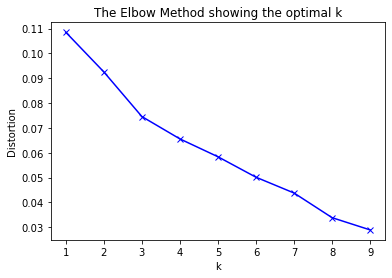

In [227]:
# try with 10 different values of k to find the best one
# find the distances
from scipy.spatial.distance import cdist

Ks = 10
distortions = []

hcmc_dist_res_clustering = hcmc_dist_res_grouped.drop('District', 1)

for k in range(1, Ks):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(hcmc_dist_res_clustering)
    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(hcmc_dist_res_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / hcmc_dist_res_clustering.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow is at k = 3

In [228]:
nclusters = 3
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(hcmc_dist_res_clustering)

In [229]:
hcmc_dist_res_grouped2 = hcmc_dist_res_grouped.copy(deep=True)
hcmc_dist_res_grouped2["Cluster Labels"] = kmeans.labels_
hcmc_dist_res_grouped3 = hcmc_dist_res_grouped2[["Cluster Labels", "District"]]
hcmc_dist_res_grouped3 = hcmc_dist_res_grouped3.set_index("District")
hcmc_dist_res_grouped3 = hcmc_dist_res_grouped3.sort_values(by=['District'])
hcmc_dist_res_grouped3 = hcmc_dist_res_grouped3.reset_index()
hcmc_dist_res_grouped3

,District,Cluster Labels
0,Binh Tan District,1
1,Binh Thanh District,2
2,District 1,1
3,District 10,2
4,District 11,0
5,District 2,1
6,District 3,2
7,District 4,1
8,District 5,0
9,District 6,1


In [230]:
hcmc_dist_df_sorted = hcmc_dist_df.copy(deep=True)
hcmc_dist_df_sorted = hcmc_dist_df_sorted.set_index("Full name")
hcmc_dist_df_sorted = hcmc_dist_df_sorted.drop(index=["District 12", "District 9", "Thu Duc District "])
hcmc_dist_df_sorted = hcmc_dist_df_sorted.sort_values(by=['Full name'])
hcmc_dist_df_sorted = hcmc_dist_df_sorted.reset_index()
hcmc_dist_df_sorted

,Full name,Status,Population,Latitude,Longitude
0,Binh Tan District,Urban District,572132,10.749809,106.605664
1,Binh Thanh District,Urban District,457362,10.804659,106.707848
2,District 1,Urban District,180225,10.774540,106.699184
3,District 10,Urban District,230345,10.773198,106.667833
4,District 11,Urban District,226854,10.764208,106.643282
5,District 2,Urban District,147490,10.791116,106.736729
6,District 3,Urban District,190553,10.783529,106.687098
7,District 4,Urban District,180980,10.759243,106.704890
8,District 5,Urban District,171452,10.756129,106.670376
9,District 6,Urban District,249329,10.746928,106.634495


In [231]:
# merge 2 tables
hcmc_dist_res_cluster_df = hcmc_dist_df_sorted.join(hcmc_dist_res_grouped3)
hcmc_dist_res_cluster_df = hcmc_dist_res_cluster_df.drop("District", axis=1)
hcmc_dist_res_cluster_df

,Full name,Status,Population,Latitude,Longitude,Cluster Labels
0,Binh Tan District,Urban District,572132,10.749809,106.605664,1
1,Binh Thanh District,Urban District,457362,10.804659,106.707848,2
2,District 1,Urban District,180225,10.774540,106.699184,1
3,District 10,Urban District,230345,10.773198,106.667833,2
4,District 11,Urban District,226854,10.764208,106.643282,0
5,District 2,Urban District,147490,10.791116,106.736729,1
6,District 3,Urban District,190553,10.783529,106.687098,2
7,District 4,Urban District,180980,10.759243,106.704890,1
8,District 5,Urban District,171452,10.756129,106.670376,0
9,District 6,Urban District,249329,10.746928,106.634495,1


In [232]:
# create map
hcmc_clusters_map = folium.Map(location=[hcm_lat, hcm_long], zoom_start=12)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i+x+(i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0.4, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        hcmc_dist_res_cluster_df['Latitude'], 
        hcmc_dist_res_cluster_df['Longitude'], 
        hcmc_dist_res_cluster_df['Full name'], 
        hcmc_dist_res_cluster_df['Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(hcmc_clusters_map)
       
hcmc_clusters_map

** find top 3 common restaurants in each ward **

In [233]:
hcmc_ward_venues = getNearbyVenues(names=hcmc_ward_final_df['Full name'],
                                   latitudes=hcmc_ward_final_df['Latitude'],
                                   longitudes=hcmc_ward_final_df['Longitude']
                                  )

An Lac Ward Binh Tan District 
An Lac A Ward Binh Tan District 
Binh Hung Hoa Ward Binh Tan District 
Binh Hung Hoa A Ward Binh Tan District 
Binh Hung Hoa B Ward Binh Tan District 
Binh Tri Dong Ward Binh Tan District 
Binh Tri Dong A Ward Binh Tan District 
Binh Tri Dong B Ward Binh Tan District 
Tan Tao Ward Binh Tan District 
Tan Tao A Ward Binh Tan District 
Ward 1 Binh Thanh District 
Ward 2 Binh Thanh District 
Ward 3 Binh Thanh District 
Ward 5 Binh Thanh District 
Ward 6 Binh Thanh District 
Ward 7 Binh Thanh District 
Ward 11 Binh Thanh District 
Ward 12 Binh Thanh District 
Ward 13 Binh Thanh District 
Ward 14 Binh Thanh District 
Ward 15 Binh Thanh District 
Ward 17 Binh Thanh District 
Ward 19 Binh Thanh District 
Ward 22 Binh Thanh District 
Ward 24 Binh Thanh District 
Ward 25 Binh Thanh District 
Ward 26 Binh Thanh District 
Ward 27 Binh Thanh District 
Ward 28 Binh Thanh District 
Ward 1 Phu Nhuan District 
Ward 2 Phu Nhuan District 
Ward 3 Phu Nhuan District 
Ward 4 P

In [234]:
hcmc_ward_venues = hcmc_ward_venues.rename(columns={'District':'Ward'})
hcmc_ward_venues.head(10)

,Ward,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,An Lac Ward Binh Tan District,10.723415,106.615762,"547 kinh duong vuong, binh tan",10.735678,106.614160,Fabric Shop
1,An Lac Ward Binh Tan District,10.723415,106.615762,Carina Plaza,10.729875,106.622865,Residential Building (Apartment / Condo)
2,An Lac Ward Binh Tan District,10.723415,106.615762,Cafe Lucky,10.721371,106.617419,Café
3,An Lac Ward Binh Tan District,10.723415,106.615762,Big C An Lạc,10.730442,106.604687,Department Store
4,An Lac Ward Binh Tan District,10.723415,106.615762,KFC Big C,10.730508,106.604737,American Restaurant
5,An Lac Ward Binh Tan District,10.723415,106.615762,Sandwich LAND An LAC,10.730462,106.604704,Sandwich Place
6,An Lac Ward Binh Tan District,10.723415,106.615762,Dáng xưa Coffee,10.738305,106.623709,Café
7,An Lac A Ward Binh Tan District,10.751050,106.622053,AEON Mall Bình Tân,10.742904,106.611836,Shopping Mall
8,An Lac A Ward Binh Tan District,10.751050,106.622053,Mocca Coffee Lounge,10.748529,106.616362,Coffee Shop
9,An Lac A Ward Binh Tan District,10.751050,106.622053,Co.opMart,10.753321,106.613401,Shopping Mall


In [235]:
# one hot encoding
hcmc_ward_onehot = pd.get_dummies(hcmc_ward_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
hcmc_ward_onehot['Ward'] = hcmc_ward_venues['Ward'] 

# move district column to the first column
fixed_columns = [hcmc_ward_onehot.columns[-1]] + list(hcmc_ward_onehot.columns[:-1])
hcmc_ward_onehot = hcmc_ward_onehot[fixed_columns]

# group the rows by district and by taking the mean of the frequency of occurrence of each category
hcmc_ward_grouped = hcmc_ward_onehot.groupby('Ward').mean().reset_index()
print(hcmc_ward_grouped.shape)
hcmc_ward_grouped


(182, 162)


,Ward,Adult Boutique,Airport Lounge,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Convention Center,Cosmetics Shop,Cruise Ship,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Fast Food Restaurant,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Park,Pet Café,Pizza Place,Playground,Pool,Pub,Public Art,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Temple,Tennis Court,Thai Restaurant,Theme Park,Train Station,Travel Agency,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Yoga Studio
0,An Lac A Ward Binh Tan District,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.235294,0.00,0.000000,0.000000,0.00,0.00,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.058824,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.058824,0.058824,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.117647,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.058824,0.000000,0.00,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
1,An Lac Ward Binh Tan District,0.000000,0.00,0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [236]:
hcmc_ward_res_grouped = hcmc_ward_grouped[hcmc_res_venue].reset_index().drop("index", axis=1)
hcmc_ward_res_grouped["Ward"]=hcmc_ward_grouped["Ward"]
hcmc_ward_res_grouped=hcmc_ward_res_grouped.set_index("Ward").reset_index()
hcmc_ward_res_grouped

,Ward,Vietnamese Restaurant,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,German Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Russian Restaurant,Restaurant,Thai Restaurant,Cantonese Restaurant,Middle Eastern Restaurant,Korean Restaurant,Spanish Restaurant,Italian Restaurant,Tapas Restaurant,North Indian Restaurant,Mexican Restaurant,Indian Restaurant,Argentinian Restaurant,Ramen Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Curry Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Udon Restaurant
0,An Lac A Ward Binh Tan District,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.058824,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,An Lac Ward Binh Tan District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Ben Nghe Ward District 1,0.080000,0.000000,0.020000,0.020000,0.000000,0.010000,0.010000,0.000000,0.040000,0.020000,0.000000,0.000000,0.020000,0.000000,0.010000,0.000000,0.01,0.030000,0.00,0.01,0.000000,0.01,0.01,0.020000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Ben Thanh Ward District 1,0.150000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.050000,0.010000,0.000000,0.010000,0.000000,0.000000,0.020000,0.000000,0.01,0.010000,0.01,0.00,0.010000,0.01,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Binh Chieu Ward Thu Duc District,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Binh Hung Hoa A Ward Binh Tan District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Binh Hung Hoa B Ward Binh Tan District,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Binh Hung Hoa Ward Binh Tan District,0.000000,0.000000,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.058824,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.058824
8,Binh Tho Ward Thu Duc District,0.038462,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.038462,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Binh Tri Dong A Ward Binh Tan District,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [237]:
def return_res_ward_venues(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:3]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(3):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
hcmc_ward_res_3 = pd.DataFrame(columns=columns)
hcmc_ward_res_3['Ward'] = hcmc_ward_res_grouped['Ward']

for ind in np.arange(hcmc_ward_res_grouped.shape[0]):
    hcmc_ward_res_3.iloc[ind, 1:] = return_res_ward_venues(hcmc_ward_res_grouped.iloc[ind, :])

hcmc_ward_res_3

,Ward,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,An Lac A Ward Binh Tan District,Fast Food Restaurant,Asian Restaurant,Italian Restaurant
1,An Lac Ward Binh Tan District,American Restaurant,Udon Restaurant,Middle Eastern Restaurant
2,Ben Nghe Ward District 1,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant
3,Ben Thanh Ward District 1,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant
4,Binh Chieu Ward Thu Duc District,Fast Food Restaurant,Asian Restaurant,Udon Restaurant
5,Binh Hung Hoa A Ward Binh Tan District,Udon Restaurant,Middle Eastern Restaurant,Fast Food Restaurant
6,Binh Hung Hoa B Ward Binh Tan District,Asian Restaurant,Seafood Restaurant,Thai Restaurant
7,Binh Hung Hoa Ward Binh Tan District,Japanese Restaurant,Udon Restaurant,Ramen Restaurant
8,Binh Tho Ward Thu Duc District,Restaurant,Korean Restaurant,Fast Food Restaurant
9,Binh Tri Dong A Ward Binh Tan District,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant


### Conduct the similar data analysis for Hanoi ###

In [238]:
hn_venues = getNearbyVenues(names=hn_dist_df['Full name'],
                                   latitudes=hn_dist_df['Latitude'],
                                   longitudes=hn_dist_df['Longitude']
                                  )
print(hn_venues.shape)
hn_venues


Bac Tu Liem District
Ba Dinh District
Cau Giay District
Dong Da District
Ha Dong District
Hai Ba Trung District
Hoang Mai District
Hoan Kiem District
Long Bien District
Nam Tu Liem District
Son Tay
Tay Ho District
Thanh Xuan District
(652, 7)


,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bac Tu Liem District,21.069861,105.757339,Câu Lạc Bộ Súng Sơn L Plus,21.060776,105.765454,Paintball Field
1,Bac Tu Liem District,21.069861,105.757339,Trường Mầm Non Đô Rê Mon,21.055119,105.763850,Gift Shop
2,Bac Tu Liem District,21.069861,105.757339,Nhà Văn Hoá Thôn Phú Diễn,21.052463,105.760365,Historic Site
3,Bac Tu Liem District,21.069861,105.757339,Tây Tựu,21.083178,105.744753,Flower Shop
4,Ba Dinh District,21.035549,105.824840,Polygon Music,21.029922,105.822862,Rock Club
5,Ba Dinh District,21.035549,105.824840,Pizza 4P,21.034181,105.812777,Pizza Place
6,Ba Dinh District,21.035549,105.824840,Pizza 4Ps Lotte Hanoi,21.032145,105.813378,Pizza Place
7,Ba Dinh District,21.035549,105.824840,Bia Hơi 19C Ngọc Hà,21.037280,105.831327,Beer Garden
8,Ba Dinh District,21.035549,105.824840,Bình Minh,21.031457,105.832087,Fried Chicken Joint
9,Ba Dinh District,21.035549,105.824840,Zennova Massage,21.029979,105.825851,Massage Studio


In [239]:
hn_venues_group=hn_venues.groupby('District').count().reset_index()
hn_venues_group


,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ba Dinh District,100,100,100,100,100,100
1,Bac Tu Liem District,4,4,4,4,4,4
2,Cau Giay District,100,100,100,100,100,100
3,Dong Da District,100,100,100,100,100,100
4,Ha Dong District,4,4,4,4,4,4
5,Hai Ba Trung District,100,100,100,100,100,100
6,Hoan Kiem District,100,100,100,100,100,100
7,Hoang Mai District,7,7,7,7,7,7
8,Long Bien District,12,12,12,12,12,12
9,Nam Tu Liem District,22,22,22,22,22,22


In [240]:
print('In above table, there are {} uniques categories.'.format(len(hn_venues['Venue Category'].unique())))


In above table, there are 139 uniques categories.


In [241]:
hn_venues['Venue Category'].unique()

array(['Paintball Field', 'Gift Shop', 'Historic Site', 'Flower Shop',
       'Rock Club', 'Pizza Place', 'Beer Garden', 'Fried Chicken Joint',
       'Massage Studio', 'Wings Joint', 'Hotel', 'Confucian Temple',
       'Noodle House', 'Vegetarian / Vegan Restaurant', 'Café',
       'Coffee Shop', 'Wine Bar', 'Vietnamese Restaurant',
       'Japanese Restaurant', 'BBQ Joint', 'Temple',
       'Armenian Restaurant', 'Scenic Lookout', 'Steakhouse',
       'Hotpot Restaurant', 'Bar', 'Tea Room', 'Monument / Landmark',
       'Russian Restaurant', 'Church', 'Supermarket', 'Wedding Hall',
       'Lake', 'Korean Restaurant', 'Shopping Mall', 'Roof Deck',
       'Buddhist Temple', 'Escape Room', 'Sushi Restaurant', 'Art Museum',
       'Park', 'Restaurant', 'Market', 'Tiki Bar', 'Ramen Restaurant',
       'Chinese Restaurant', 'Satay Restaurant', 'Palace',
       'Himalayan Restaurant', 'Ice Cream Shop', 'Mongolian Restaurant',
       'Taco Place', 'History Museum', 'Gastropub', 'Castle', 'Bi

In [242]:
hn_venues

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bac Tu Liem District,21.069861,105.757339,Câu Lạc Bộ Súng Sơn L Plus,21.060776,105.765454,Paintball Field
1,Bac Tu Liem District,21.069861,105.757339,Trường Mầm Non Đô Rê Mon,21.055119,105.763850,Gift Shop
2,Bac Tu Liem District,21.069861,105.757339,Nhà Văn Hoá Thôn Phú Diễn,21.052463,105.760365,Historic Site
3,Bac Tu Liem District,21.069861,105.757339,Tây Tựu,21.083178,105.744753,Flower Shop
4,Ba Dinh District,21.035549,105.824840,Polygon Music,21.029922,105.822862,Rock Club
5,Ba Dinh District,21.035549,105.824840,Pizza 4P,21.034181,105.812777,Pizza Place
6,Ba Dinh District,21.035549,105.824840,Pizza 4Ps Lotte Hanoi,21.032145,105.813378,Pizza Place
7,Ba Dinh District,21.035549,105.824840,Bia Hơi 19C Ngọc Hà,21.037280,105.831327,Beer Garden
8,Ba Dinh District,21.035549,105.824840,Bình Minh,21.031457,105.832087,Fried Chicken Joint
9,Ba Dinh District,21.035549,105.824840,Zennova Massage,21.029979,105.825851,Massage Studio


In [243]:
count_ = 0
for val in hcmc_venues['Venue Category'].unique():
    if (val not in hn_venues['Venue Category'].unique()):
        print(val+", ",end="")
        count_ += 1
print("\n \n",count_,' venues exist in HCMC but not in Hanoi', sep="")

Fabric Shop, Travel Agency, Convention Center, German Restaurant, Diner, Dive Bar, Flea Market, Warehouse Store, Boutique, Cantonese Restaurant, Yoga Studio, Design Studio, Middle Eastern Restaurant, Department Store, Spanish Restaurant, Jazz Club, Speakeasy, Whisky Bar, Clothing Store, Jewelry Store, Burger Joint, Cupcake Shop, Tapas Restaurant, Opera House, Argentinian Restaurant, Shoe Store, Tattoo Parlor, Fountain, Deli / Bodega, American Restaurant, Street Food Gathering, Mediterranean Restaurant, Sports Club, Pool, Convenience Store, Japanese Curry Restaurant, Tennis Court, Bed & Breakfast, Dim Sum Restaurant, Electronics Store, Dumpling Restaurant, Resort, Residential Building (Apartment / Condo), Basketball Stadium, Theme Park, Sporting Goods Shop, Shopping Plaza, Airport Lounge, Udon Restaurant, Arcade, 
 
50 venues exist in HCMC but not in Hanoi


In [244]:
count_ = 0
for val in hn_venues['Venue Category'].unique():
    if (val not in hcmc_venues['Venue Category'].unique()):
        print(val+", ",end="")
        count_ += 1
print("\n \n",count_,' venues exist in Hanoi but not in HCMC', sep="")

Paintball Field, Historic Site, Rock Club, Confucian Temple, Wine Bar, Armenian Restaurant, Scenic Lookout, Monument / Landmark, Church, Wedding Hall, Lake, Roof Deck, Buddhist Temple, Escape Room, Art Museum, Tiki Bar, Satay Restaurant, Palace, Himalayan Restaurant, Mongolian Restaurant, Taco Place, Castle, Plaza, Soccer Stadium, Botanical Garden, Arepa Restaurant, Fish & Chips Shop, Malay Restaurant, Australian Restaurant, Peruvian Restaurant, Halal Restaurant, Pedestrian Plaza, Board Shop, Bulgarian Restaurant, Karaoke Bar, Soba Restaurant, Outlet Store, Chocolate Shop, Theater, Salad Place, Modern European Restaurant, Frozen Yogurt Shop, Cultural Center, Hainan Restaurant, Soccer Field, Intersection, Stadium, Gym Pool, Tourist Information Center, Antique Shop, Food & Drink Shop, Pastry Shop, Sports Bar, Ukrainian Restaurant, Garden, Polish Restaurant, Art Gallery, 
 
57 venues exist in Hanoi but not in HCMC


<function matplotlib.pyplot.show(close=None, block=None)>

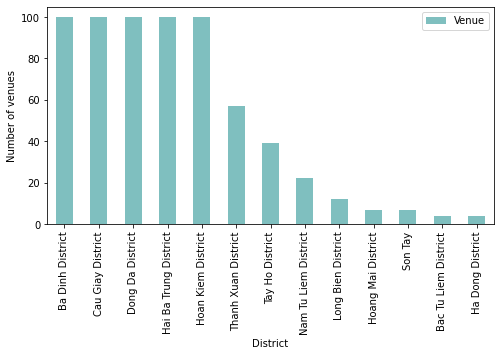

In [245]:
import matplotlib.pyplot as plt
ax = hn_venues_group.sort_values(by="Venue", ascending=False).plot(x="District", y="Venue", kind="bar", figsize=(8,4), color="teal", alpha=0.5)
ax.set_ylabel("Number of venues")
plt.show

** We notice Ha Dong District, Son Tay District-level Town, Bac Tu Liem District and Hoang Mai District do not have many venues taken from API, so we elimiate them. **

In [246]:
hn_venues2=hn_venues.set_index("District")
hn_venues2=hn_venues2.drop(index="Ha Dong District", axis=0)
hn_venues2=hn_venues2.drop(index="Son Tay", axis=0)
hn_venues2=hn_venues2.drop(index="Bac Tu Liem District", axis=0)
hn_venues2=hn_venues2.drop(index="Hoang Mai District", axis=0)
print(hn_venues2.shape)
hn_venues2.head()


(630, 6)


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Ba Dinh District,21.035549,105.82484,Polygon Music,21.029922,105.822862,Rock Club
Ba Dinh District,21.035549,105.82484,Pizza 4P,21.034181,105.812777,Pizza Place
Ba Dinh District,21.035549,105.82484,Pizza 4Ps Lotte Hanoi,21.032145,105.813378,Pizza Place
Ba Dinh District,21.035549,105.82484,Bia Hơi 19C Ngọc Hà,21.037280,105.831327,Beer Garden
Ba Dinh District,21.035549,105.82484,Bình Minh,21.031457,105.832087,Fried Chicken Joint


In [247]:
hn_venues_group2=hn_venues2.groupby('District').count().reset_index()
hn_venues_group2


,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ba Dinh District,100,100,100,100,100,100
1,Cau Giay District,100,100,100,100,100,100
2,Dong Da District,100,100,100,100,100,100
3,Hai Ba Trung District,100,100,100,100,100,100
4,Hoan Kiem District,100,100,100,100,100,100
5,Long Bien District,12,12,12,12,12,12
6,Nam Tu Liem District,22,22,22,22,22,22
7,Tay Ho District,39,39,39,39,39,39
8,Thanh Xuan District,57,57,57,57,57,57


In [248]:
hn_venues2['Venue Category'].unique()[:20]

array(['Rock Club', 'Pizza Place', 'Beer Garden', 'Fried Chicken Joint',
       'Massage Studio', 'Wings Joint', 'Hotel', 'Confucian Temple',
       'Noodle House', 'Vegetarian / Vegan Restaurant', 'Café',
       'Coffee Shop', 'Wine Bar', 'Vietnamese Restaurant',
       'Japanese Restaurant', 'BBQ Joint', 'Temple',
       'Armenian Restaurant', 'Scenic Lookout', 'Steakhouse'],
      dtype=object)

In [286]:
hn_res_count1 = 0
hn_res_count2 = 0
hn_res_venue = []
for venue in hn_venues['Venue Category']:
    if "Restaurant" in venue:
        hn_res_count1 += 1
for venue in hn_venues['Venue Category'].unique():
    if "Restaurant" in venue:
        hn_res_count2 += 1
        hn_res_venue.append(venue)
print('The number of restaurants in Hanoi is:', hn_res_count1,'\n')
print('The number of different type of restaurants in hanoi is:', hn_res_count2,'\n')
print('They are:')
for res in hn_res_venue:
    print(res, ":", hn_venues['Venue Category'][hn_venues['Venue Category']==res].count())


The number of restaurants in Hanoi is: 176 

The number of different type of restaurants in hanoi is: 34 

They are:
Vegetarian / Vegan Restaurant : 5
Vietnamese Restaurant : 68
Japanese Restaurant : 20
Armenian Restaurant : 1
Hotpot Restaurant : 7
Russian Restaurant : 2
Korean Restaurant : 10
Sushi Restaurant : 4
Restaurant : 3
Ramen Restaurant : 2
Chinese Restaurant : 2
Satay Restaurant : 1
Himalayan Restaurant : 2
Mongolian Restaurant : 2
Arepa Restaurant : 2
Malay Restaurant : 2
Fast Food Restaurant : 12
Australian Restaurant : 1
Peruvian Restaurant : 1
Halal Restaurant : 1
Seafood Restaurant : 4
Thai Restaurant : 5
Indian Restaurant : 1
Bulgarian Restaurant : 2
Soba Restaurant : 1
Italian Restaurant : 4
Modern European Restaurant : 2
French Restaurant : 2
North Indian Restaurant : 1
Hainan Restaurant : 1
Asian Restaurant : 2
Mexican Restaurant : 1
Ukrainian Restaurant : 1
Polish Restaurant : 1


In [250]:
count_ = 0
for val in hcmc_res_venue:
    if val not in hn_res_venue:
        print(val+", ",end="")
        count_ += 1

print("\n \n", count_, " types of restaurant exist in HCMC but not in Hanoi", sep="")


German Restaurant, Cantonese Restaurant, Middle Eastern Restaurant, Spanish Restaurant, Tapas Restaurant, Argentinian Restaurant, American Restaurant, Mediterranean Restaurant, Japanese Curry Restaurant, Dim Sum Restaurant, Dumpling Restaurant, Udon Restaurant, 
 
12 types of restaurant exist in HCMC but not in Hanoi


In [251]:
count_ = 0
for val in hn_res_venue:
    if val not in hcmc_res_venue:
        print(val+", ",end="")
        count_ += 1

print("\n \n", count_, " types of restaurant exist in Hanoi but not in HCMC", sep="")

Armenian Restaurant, Satay Restaurant, Himalayan Restaurant, Mongolian Restaurant, Arepa Restaurant, Malay Restaurant, Australian Restaurant, Peruvian Restaurant, Halal Restaurant, Bulgarian Restaurant, Soba Restaurant, Modern European Restaurant, Hainan Restaurant, Ukrainian Restaurant, Polish Restaurant, 
 
15 types of restaurant exist in Hanoi but not in HCMC


In [252]:
hn_pop = hn_dist_df[~hn_dist_df['Full name'].isin(['Bac Tu Liem District', 'Son Tay', 'Ha Dong District', 'Hoang Mai District'])]['Population'].sum()
print("The population of Hanoi research districts is: ",hn_pop)


The population of Hanoi research districts is:  2015562


In [253]:
print("The number of restaurants in Hanoi per resident is 1 per", hn_pop/hn_res_count1)

The number of restaurants in Hanoi per resident is 1 per 11452.056818181818


In [254]:
hn_dist_df

,Status,Full name,Population,Latitude,Longitude
0,Urban District,Bac Tu Liem District,222972,21.069861,105.757339
1,Urban District,Ba Dinh District,225910,21.035549,105.824840
2,Urban District,Cau Giay District,225643,21.027277,105.791464
3,Urban District,Dong Da District,370117,21.012920,105.827196
4,Urban District,Ha Dong District,233136,20.952443,105.760955
5,Urban District,Hai Ba Trung District,295726,21.005970,105.857484
6,Urban District,Hoang Mai District,335509,20.974598,105.863707
7,Urban District,Hoan Kiem District,147334,21.028524,105.850716
8,Urban District,Long Bien District,226913,21.037154,105.897839
9,Urban District,Nam Tu Liem District,169586,21.012846,105.760874


** Top 10 venues in each district of Hanoi **

In [255]:
hn_venues2 = hn_venues2.reset_index()
hn_venues2.shape


(630, 7)

In [256]:
# one hot encoding
hn_dist_onehot = pd.get_dummies(hn_venues2[['Venue Category']], prefix="", prefix_sep="")
# add district column back to dataframe
hn_dist_onehot['District'] = hn_venues2['District'] 
# move district column to the first column
fixed_columns = [hn_dist_onehot.columns[-1]] + list(hn_dist_onehot.columns[:-1])
hn_dist_onehot = hn_dist_onehot[fixed_columns]
# group the rows by district and by taking the mean of the frequency of occurrence of each category
hn_dist_grouped = hn_dist_onehot.groupby('District').mean().reset_index()
print(hn_dist_grouped.shape)
hn_dist_grouped


(9, 133)


,District,Arepa Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Bulgarian Restaurant,Café,Castle,Chinese Restaurant,Chocolate Shop,Church,Cocktail Bar,Coffee Shop,Confucian Temple,Cultural Center,Dessert Shop,Escape Room,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lounge,Malay Restaurant,Market,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Noodle House,North Indian Restaurant,Outdoors & Recreation,Palace,Park,Pastry Shop,Pedestrian Plaza,Peruvian Restaurant,Pizza Place,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Temple,Thai Restaurant,Theater,Tiki Bar,Tourist Information Center,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Zoo
0,Ba Dinh District,0.00,0.01,0.000000,0.01,0.00,0.00,0.000000,0.00,0.010000,0.010000,0.01,0.000000,0.030000,0.02,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,0.01,0.000000,0.00,0.000000,0.090000,0.01,0.01,0.00,0.01,0.00,0.100000,0.01,0.00,0.00,0.01,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.010000,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.01,0.01,0.020000,0.00,0.030000,0.00,0.03,0.010000,0.00,0.000000,0.000000,0.040000,0.00,0.00,0.020000,0.01,0.00,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.01,0.02,0.00,0.000000,0.00,0.00,0.020000,0.00,0.000000,0.01,0.01,0.000000,0.000000,0.00,0.030000,0.01,0.000000,0.000000,0.01,0.01,0.020000,0.010000,0.01,0.00,0.000000,0.01,0.01,0.00,0.010000,0.00,0.00,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.010000,0.01,0.010000,0.02,0.000000,0.00,0.01,0.000000,0.000000,0.01,0.070000,0.000000,0.01,0.010000,0.01,0.00
1,Cau Giay District,0.01,0.00,0.000000,0.02,0.00,0.00,0.000000,0.01,0.040000,0.030000,0.00,0.010000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.01,0.00,0.03,0.00,0.010000,0.00,0.000000,0.110000,0.00,0.00,0.00,0.00,0.01,0.080000,0.00,0.00,0.00,0.00,0.050000,0.01,0.000000,0.00,0.000000,0.01,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.000000,0.010000,0.01,0.000000,0.00,0.01,0.00,0.00,0.000000,0.00,0.030000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.080000,0.00,0.00,0.040000,0.00,0.00,0.02,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.00,0.00,0.040000,0.01,0.00,0.000000,0.00,0.000000,0.00,0.02,0.000000,0.000000,0.01,0.030000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.01,0.01,0.040000,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00,0.010000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.00,0.090000,0.000000,0.00,0.000000,0.00,0.01
2,Dong Da District,0.01,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.020000,0.020000,0.00,0.010000,0.020000,0.00,0.01,0.01,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.01,0.010000,0.060000,0.00,0.01,0.00,0.00,0.00,0.140000,0.01,0.00,0.01,0.02,0.020000,0.00,0.000000,0.00,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.

In [257]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns2 = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns2.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns2.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
hn_dist_10 = pd.DataFrame(columns=columns2)
hn_dist_10['District'] = hn_dist_grouped['District']
for ind in np.arange(hn_dist_grouped.shape[0]):
    hn_dist_10.iloc[ind, 1:] = return_most_common_venues(hn_dist_grouped.iloc[ind, :], num_top_venues)
hn_dist_10


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ba Dinh District,Coffee Shop,Café,Vietnamese Restaurant,Japanese Restaurant,Beer Garden,Hotel,Hotpot Restaurant,Pizza Place,History Museum,Rock Club
1,Cau Giay District,Café,Vietnamese Restaurant,Japanese Restaurant,Coffee Shop,Fast Food Restaurant,Multiplex,Korean Restaurant,Shopping Mall,BBQ Joint,Bubble Tea Shop
2,Dong Da District,Coffee Shop,Vietnamese Restaurant,Café,Pizza Place,Supermarket,Multiplex,Rock Club,Food Court,Hotel,Fast Food Restaurant
3,Hai Ba Trung District,Vietnamese Restaurant,Coffee Shop,Japanese Restaurant,Café,Noodle House,Hotel,BBQ Joint,Dessert Shop,Thai Restaurant,Hotpot Restaurant
4,Hoan Kiem District,Hotel,Vietnamese Restaurant,Coffee Shop,Café,Noodle House,Lounge,Spa,Sandwich Place,Cocktail Bar,BBQ Joint
5,Long Bien District,Coffee Shop,BBQ Joint,Market,Golf Course,Multiplex,Food Court,Pizza Place,Café,Shopping Mall,Bowling Alley
6,Nam Tu Liem District,Café,Coffee Shop,BBQ Joint,Fast Food Restaurant,Furniture / Home Store,Shopping Mall,Buffet,Golf Course,Stadium,Gym Pool
7,Tay Ho District,Café,Vietnamese Restaurant,Noodle House,Bakery,Garden,Pastry Shop,Japanese Restaurant,Flower Shop,Pub,Pizza Place
8,Thanh Xuan District,Coffee Shop,Bakery,Multiplex,Korean Restaurant,Fast Food Restaurant,Pizza Place,Café,Supermarket,Soccer Field,Beer Garden


In [258]:
hn_dist_res_grouped = hn_dist_grouped[hn_res_venue].reset_index().drop("index", axis=1)
hn_dist_res_grouped["District"]=hn_dist_grouped["District"]
hn_dist_res_grouped=hn_dist_res_grouped.set_index("District").reset_index()
hn_dist_res_grouped


,District,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Japanese Restaurant,Armenian Restaurant,Hotpot Restaurant,Russian Restaurant,Korean Restaurant,Sushi Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Satay Restaurant,Himalayan Restaurant,Mongolian Restaurant,Arepa Restaurant,Malay Restaurant,Fast Food Restaurant,Australian Restaurant,Peruvian Restaurant,Halal Restaurant,Seafood Restaurant,Thai Restaurant,Indian Restaurant,Bulgarian Restaurant,Soba Restaurant,Italian Restaurant,Modern European Restaurant,French Restaurant,North Indian Restaurant,Hainan Restaurant,Asian Restaurant,Mexican Restaurant,Ukrainian Restaurant,Polish Restaurant
0,Ba Dinh District,0.01,0.070000,0.040000,0.01,0.03,0.01,0.020000,0.010000,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
1,Cau Giay District,0.00,0.090000,0.080000,0.00,0.00,0.00,0.040000,0.010000,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.050000,0.01,0.01,0.01,0.01,0.010000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
2,Dong Da District,0.01,0.090000,0.010000,0.00,0.01,0.01,0.010000,0.000000,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.020000,0.00,0.00,0.00,0.01,0.000000,0.01,0.010000,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
3,Hai Ba Trung District,0.01,0.200000,0.060000,0.00,0.02,0.00,0.000000,0.010000,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.030000,0.00,0.000000,0.00,0.010000,0.010000,0.01,0.01,0.01,0.00,0.000000,0.000000,0.000000
4,Hoan Kiem District,0.02,0.160000,0.000000,0.00,0.01,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.020000,0.000000,0.01,0.00,0.00,0.01,0.000000,0.000000,0.000000
5,Long Bien District,0.00,0.083333,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
6,Nam Tu Liem District,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.045455,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
7,Tay Ho District,0.00,0.076923,0.025641,0.00,0.00,0.00,0.000000,0.025641,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.025641,0.025641,0.00,0.00,0.00,0.00,0.025641,0.025641,0.025641
8,Thanh Xuan District,0.00,0.035088,0.000000,0.00,0.00,0.00,0.052632,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.052632,0.00,0.00,0.00,0.00,0.017544,0.00,0.017544,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000


In [259]:
def return_res_venues(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:10]
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['District']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))
# create a new dataframe
hn_dist_res_10 = pd.DataFrame(columns=columns)
hn_dist_res_10['District'] = hn_dist_res_grouped['District']
for ind in np.arange(hn_dist_res_grouped.shape[0]):
    hn_dist_res_10.iloc[ind, 1:] = return_res_venues(hn_dist_res_grouped.iloc[ind, :])
hn_dist_res_10


,District,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Ba Dinh District,Vietnamese Restaurant,Japanese Restaurant,Hotpot Restaurant,Korean Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Mongolian Restaurant,Himalayan Restaurant,Satay Restaurant,Chinese Restaurant
1,Cau Giay District,Vietnamese Restaurant,Japanese Restaurant,Fast Food Restaurant,Korean Restaurant,Malay Restaurant,Thai Restaurant,Australian Restaurant,Peruvian Restaurant,Halal Restaurant,Seafood Restaurant
2,Dong Da District,Vietnamese Restaurant,Fast Food Restaurant,Seafood Restaurant,Japanese Restaurant,Hotpot Restaurant,Russian Restaurant,Korean Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant
3,Hai Ba Trung District,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Hotpot Restaurant,Italian Restaurant,Restaurant,Sushi Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant
4,Hoan Kiem District,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,French Restaurant,Hotpot Restaurant,Fast Food Restaurant,Asian Restaurant,North Indian Restaurant,Modern European Restaurant,Mexican Restaurant
5,Long Bien District,Vietnamese Restaurant,Polish Restaurant,Restaurant,Arepa Restaurant,Mongolian Restaurant,Himalayan Restaurant,Satay Restaurant,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant
6,Nam Tu Liem District,Fast Food Restaurant,Restaurant,Arepa Restaurant,Mongolian Restaurant,Himalayan Restaurant,Satay Restaurant,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant,Ukrainian Restaurant
7,Tay Ho District,Vietnamese Restaurant,Polish Restaurant,Mexican Restaurant,Japanese Restaurant,Ukrainian Restaurant,Modern European Restaurant,Italian Restaurant,Sushi Restaurant,Ramen Restaurant,Himalayan Restaurant
8,Thanh Xuan District,Fast Food Restaurant,Korean Restaurant,Vietnamese Restaurant,Bulgarian Restaurant,Thai Restaurant,Mongolian Restaurant,Himalayan Restaurant,Satay Restaurant,Chinese Restaurant,Ramen Restaurant


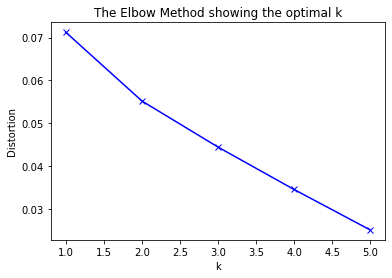

In [260]:
# try with 6 different values of k to find the best one
# find the distances
from scipy.spatial.distance import cdist
Ks = 6
distortions = []
hn_dist_res_clustering = hn_dist_res_grouped.drop('District', 1)
for k in range(1, Ks):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(hn_dist_res_clustering)
    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(hn_dist_res_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / hn_dist_res_clustering.shape[0]
    )
plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


The elbow is at k = 2

In [261]:
nclusters = 2
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(hn_dist_res_clustering)

In [262]:
hn_dist_res_grouped2 = hn_dist_res_grouped.copy(deep=True)
hn_dist_res_grouped2["Cluster Labels"] = kmeans.labels_
hn_dist_res_grouped3 = hn_dist_res_grouped2[["Cluster Labels", "District"]]
hn_dist_res_grouped3 = hn_dist_res_grouped3.set_index("District")
hn_dist_res_grouped3 = hn_dist_res_grouped3.sort_values(by=['District'])
hn_dist_res_grouped3 = hn_dist_res_grouped3.reset_index()
hn_dist_res_grouped3


,District,Cluster Labels
0,Ba Dinh District,1
1,Cau Giay District,1
2,Dong Da District,1
3,Hai Ba Trung District,0
4,Hoan Kiem District,0
5,Long Bien District,1
6,Nam Tu Liem District,1
7,Tay Ho District,1
8,Thanh Xuan District,1


In [263]:
hn_dist_df_sorted = hn_dist_df.copy(deep=True)
hn_dist_df_sorted = hn_dist_df_sorted.set_index("Full name")
hn_dist_df_sorted = hn_dist_df_sorted.drop(index=["Son Tay", "Bac Tu Liem District", "Hoang Mai District", "Ha Dong District"])
hn_dist_df_sorted = hn_dist_df_sorted.sort_values(by=['Full name'])
hn_dist_df_sorted = hn_dist_df_sorted.reset_index()
hn_dist_df_sorted


,Full name,Status,Population,Latitude,Longitude
0,Ba Dinh District,Urban District,225910,21.035549,105.824840
1,Cau Giay District,Urban District,225643,21.027277,105.791464
2,Dong Da District,Urban District,370117,21.012920,105.827196
3,Hai Ba Trung District,Urban District,295726,21.005970,105.857484
4,Hoan Kiem District,Urban District,147334,21.028524,105.850716
5,Long Bien District,Urban District,226913,21.037154,105.897839
6,Nam Tu Liem District,Urban District,169586,21.012846,105.760874
7,Tay Ho District,Urban District,130639,21.079042,105.815432
8,Thanh Xuan District,Urban District,223694,20.993687,105.814301


In [264]:
# merge 2 banrg tren lai
hn_dist_res_cluster_df = hn_dist_df_sorted.join(hn_dist_res_grouped3)
hn_dist_res_cluster_df = hn_dist_res_cluster_df.drop("District", axis=1)
hn_dist_res_cluster_df


,Full name,Status,Population,Latitude,Longitude,Cluster Labels
0,Ba Dinh District,Urban District,225910,21.035549,105.824840,1
1,Cau Giay District,Urban District,225643,21.027277,105.791464,1
2,Dong Da District,Urban District,370117,21.012920,105.827196,1
3,Hai Ba Trung District,Urban District,295726,21.005970,105.857484,0
4,Hoan Kiem District,Urban District,147334,21.028524,105.850716,0
5,Long Bien District,Urban District,226913,21.037154,105.897839,1
6,Nam Tu Liem District,Urban District,169586,21.012846,105.760874,1
7,Tay Ho District,Urban District,130639,21.079042,105.815432,1
8,Thanh Xuan District,Urban District,223694,20.993687,105.814301,1


In [265]:
# create map
hn_clusters_map = folium.Map(location=[hn_lat, hn_long], zoom_start=12)
# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i+x+(i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0.4, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        hn_dist_res_cluster_df['Latitude'], 
        hn_dist_res_cluster_df['Longitude'], 
        hn_dist_res_cluster_df['Full name'], 
        hn_dist_res_cluster_df['Cluster Labels']
):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(hn_clusters_map)
hn_clusters_map


In [266]:
hn_ward_venues = getNearbyVenues(names=hn_ward_final_df['Full name'],
                                   latitudes=hn_ward_final_df['Latitude'],
                                   longitudes=hn_ward_final_df['Longitude']
                                  )




Minh Khai Bac Tu Liem District
Phu Dien Bac Tu Liem District
Thuong Cat Bac Tu Liem District
Cong Vi Ba Dinh District
Dien Bien Ba Dinh District
Giang Vo Ba Dinh District
Kim Ma Ba Dinh District
Lieu Giai Ba Dinh District
Ngoc Ha Ba Dinh District
Ngoc Khanh Ba Dinh District
Nguyen Trung Truc Ba Dinh District
Phuc Xa Ba Dinh District
Quan Thanh Ba Dinh District
Thanh Cong Ba Dinh District
Truc Bach Ba Dinh District
Vinh Phuc Ba Dinh District
Dich Vong Cau Giay District
Dich Vong Hau Cau Giay District
Mai Dich Cau Giay District
Yen Hoa Cau Giay District
Cat Linh Dong Da District
Hang Bot Dong Da District
Khuong Thuong Dong Da District
Lang Ha Dong Da District
Nga Tu So Dong Da District
O Cho Dua Dong Da District
Phuong Mai Dong Da District
Quang Trung Dong Da District
Quoc Tu Giam Dong Da District
Tho Quan Dong Da District
Trung Phung Dong Da District
Trung Tu Dong Da District
Van Chuong Dong Da District
Van Mieu Dong Da District
Bien Giang Ha Dong District
Duong Noi Ha Dong District
Ha 

In [267]:
hn_ward_venues = hn_ward_venues.rename(columns={'District':'Ward'})
hn_ward_venues.head(10)

,Ward,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Minh Khai Bac Tu Liem District,21.047964,105.74480,Quán ốc Vân Trường,21.049662,105.751137,Seafood Restaurant
1,Minh Khai Bac Tu Liem District,21.047964,105.74480,Sân bóng Xuân Phương,21.040115,105.750135,Soccer Field
2,Minh Khai Bac Tu Liem District,21.047964,105.74480,Trung Tâm Huấn Luyện Thể Thao Quốc Gia,21.051798,105.731653,Stadium
3,Minh Khai Bac Tu Liem District,21.047964,105.74480,Chợ Diễn,21.041435,105.760302,Market
4,Minh Khai Bac Tu Liem District,21.047964,105.74480,Thịt Chó Trạm Bơm,21.036982,105.757473,Vietnamese Restaurant
5,Minh Khai Bac Tu Liem District,21.047964,105.74480,CircleK Phú Diễn,21.046878,105.762998,Grocery Store
6,Minh Khai Bac Tu Liem District,21.047964,105.74480,Parkson Landmark 72,21.045341,105.763098,Shopping Mall
7,Minh Khai Bac Tu Liem District,21.047964,105.74480,Công Ty Cổ Phần Quốc Tế Thiên Bằng,21.065266,105.744125,Business Service
8,Phu Dien Bac Tu Liem District,21.043940,105.75526,Bò tơ Tây Ninh,21.036133,105.770034,BBQ Joint
9,Phu Dien Bac Tu Liem District,21.043940,105.75526,Chợ Diễn,21.041435,105.760302,Market


In [271]:
# one hot encoding
hn_ward_onehot = pd.get_dummies(hn_ward_venues[['Venue Category']], prefix="", prefix_sep="")
# add district column back to dataframe
hn_ward_onehot['Ward'] = hn_ward_venues['Ward'] 
# move district column to the first column
fixed_columns = [hn_ward_onehot.columns[-1]] + list(hn_ward_onehot.columns[:-1])
hn_ward_onehot = hn_ward_onehot[fixed_columns]
# group the rows by district and by taking the mean of the frequency of occurrence of each category
hn_ward_grouped = hn_ward_onehot.groupby('Ward').mean().reset_index()
print(hn_ward_grouped.shape)
hn_ward_grouped


(103, 175)


,Ward,Antique Shop,Arcade,Arepa Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Bowling Alley,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Bulgarian Restaurant,Burger Joint,Bus Station,Business Service,Café,Camera Store,Castle,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Confucian Temple,Convenience Store,Convention Center,Cultural Center,Czech Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Escape Room,Event Space,Farm,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Mattress Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Paintball Field,Palace,Park,Pedestrian Plaza,Peruvian Restaurant,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Rental Car Location,Resort,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Village,Wedding Hall,Well,Wine Bar,Wings Joint,Women's Store,Zoo
0,Bien Giang Ha Dong District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.090909,0.000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.090909,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
1,Bo De Long Bien District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.

In [294]:
hn_res_venue2 = hn_res_venue[:]
hn_res_venue2.remove('Ukrainian Restaurant')
hn_res_venue2.remove('Hainan Restaurant')
hn_res_venue2.remove('Polish Restaurant')
hn_ward_res_grouped = hn_ward_grouped[hn_res_venue2].reset_index().drop("index", axis=1)
hn_ward_res_grouped["Ward"]=hn_ward_grouped["Ward"]
hn_ward_res_grouped=hn_ward_res_grouped.set_index("Ward").reset_index()
hn_ward_res_grouped


,Ward,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Japanese Restaurant,Armenian Restaurant,Hotpot Restaurant,Russian Restaurant,Korean Restaurant,Sushi Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Satay Restaurant,Himalayan Restaurant,Mongolian Restaurant,Arepa Restaurant,Malay Restaurant,Fast Food Restaurant,Australian Restaurant,Peruvian Restaurant,Halal Restaurant,Seafood Restaurant,Thai Restaurant,Indian Restaurant,Bulgarian Restaurant,Soba Restaurant,Italian Restaurant,Modern European Restaurant,French Restaurant,North Indian Restaurant,Asian Restaurant,Mexican Restaurant
0,Bien Giang Ha Dong District,0.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.000000
1,Bo De Long Bien District,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Bui Thi Xuan Hai Ba Trung District,0.020000,0.120000,0.020000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.00,0.000000,0.000000
3,Buoi Tay Ho District,0.000000,0.067416,0.033708,0.011236,0.000000,0.000000,0.033708,0.022472,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.011236,0.000000,0.011236,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.011236,0.011236,0.011236,0.00,0.000000,0.000000
4,Cat Linh Dong Da District,0.020000,0.110000,0.000000,0.010000,0.030000,0.010000,0.020000,0.010000,0.020000,0.010000,0.010000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000
5,Chuong Duong Do Hoan Kiem District,0.010000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.00,0.000000,0.000000
6,Cong Vi Ba Dinh District,0.010000,0.090000,0.070000,0.010000,0.010000,0.010000,0.020000,0.030000,0.010000,0.010000,0.010000,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000
7,Cu Khoi Long Bien District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.071429,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Cua Dong Hoan Kiem District,0.030000,0.160000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.010000,0.000000
9,Cua Nam Hoan Kiem District,0.020000,0.140000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.010000,0.000000


In [295]:
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(3):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))
# create a new dataframe
hn_ward_res_3 = pd.DataFrame(columns=columns)
hn_ward_res_3['Ward'] = hn_ward_res_grouped['Ward']
for ind in np.arange(hn_ward_res_grouped.shape[0]):
    hn_ward_res_3.iloc[ind, 1:] = return_res_ward_venues(hn_ward_res_grouped.iloc[ind, :])
hn_ward_res_3


,Ward,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,Bien Giang Ha Dong District,Vietnamese Restaurant,Seafood Restaurant,Asian Restaurant
1,Bo De Long Bien District,Vietnamese Restaurant,Fast Food Restaurant,Mexican Restaurant
2,Bui Thi Xuan Hai Ba Trung District,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Restaurant
3,Buoi Tay Ho District,Vietnamese Restaurant,Japanese Restaurant,Korean Restaurant
4,Cat Linh Dong Da District,Vietnamese Restaurant,Hotpot Restaurant,Vegetarian / Vegan Restaurant
5,Chuong Duong Do Hoan Kiem District,Vietnamese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
6,Cong Vi Ba Dinh District,Vietnamese Restaurant,Japanese Restaurant,Sushi Restaurant
7,Cu Khoi Long Bien District,Korean Restaurant,Sushi Restaurant,Ramen Restaurant
8,Cua Dong Hoan Kiem District,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant
9,Cua Nam Hoan Kiem District,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Restaurant


## RESULT AND DISCUSSION <a name="discussion"></a>

** In terms of venues, the 2 most popular in HCMC are: **  
- Cafe/Coffee Shop
- Vietnamese Restaurant  

** In terms of venues, the 2 most popular in Hanoi are: **  
- Cafe/Coffee Shop
- Vietnamese Restaurants  

### The 2 cities do not differ regarding this aspect. They are great destinations to explore coffee culture and cuisine of Vietnam. 

** In terms of restaurants, the 3 most popular restaurants in HCMC are: **
- Vietnamese Restaurant
- Seafood Restaurant
- Chinese Restaurant

** In terms of restaurants, the 3 most popular restaurants in Hanoi are: **
- Vietnamese Restaurant
- Japanese Restaurant
- Fastfood Restaurant

### For seafood lovers and Chinese food lovers, HCMC is a better destination. However, for Japanese cuines and fastfood lovers, Hanoi must be their choice.

** In terms of diversity: **

Given the research scope, the number of restaurants per resident in HCMC is: 1 per 12667, slightly lower than that of Hanoi, which is 11452.

The number of different types of restaurants in HCMC is: 31, slightly lower than that of Ha Noi, which is 33.

### Thus, food-lovers may prefer Hanoi, but the difference is not that much. The 2 cities appear to be similarly the same regarding diversity of restaurants' choices of cuisine and restaurant density.

** According to the map, the 3 clusters in HCMC based on restaurant venues are: **
- Cluster 0: Dist. 11, Dist. 5, Dist. 8: Chinese restaurants dominate the market, though Vietnamese restaurants are popular.
- Cluster 1: Binh Thanh Dist., Phu Nhuan Dist., Tan Binh Dist., Dist. 10, Dist. 3: Foreign cuisines are diverse, and Vietnamese restaurants are extremely popular.
- Cluster 2: Dist. 1, Dist. 2, Dist. 3, Dist. 4, Dist. 7, Binh Tan Dist., Dist. 6, Go Vap Dist., Tan Phu Dist: Foreign cuisines are diverse, and Vietnamese restaurants are also popular. However, the diversity of cuisines there is higher.

### In conclusion, for travellers  desiring to explore Vietnamese cuisine, it is advisable to visit eateries in Binh Thanh Dist., Phu Nhuan Dist., Tan Binh Dist., Dist. 10, Dist. 3 while for Chinese cuisine lovers, it is a must to visit Dist. 11, Dist. 5, Dist. 8.

** According to the map, the 2 clusters in Hanoi based on restaurant venues are: **
- Cluster 0: Hai Ba Trung District, Hoan Kiem District, where Vietnamese restaurants are popular and relatively easier to find compared to other districts
- Cluster 1: remaining districts

### In conclusion, for travellers  desiring to explore Vietnamese cuisine, it is advisable to visit eateries in Hai Ba Trung and Hoan Kiem District first. 

### With regards to clusters, HCMC is divided to more distinct clusters apparently, thus it is more interesting. This also helps travellers plan their visits easier so that they can explore all cuisines available there without wasting time searching places.



## CONCLUSION <a name="conclusion"></a>

The comparison of HCMC and Hanoi from the perspective of a food hunter ends here after giving some hints on the differences and similarities between 2 cities. Definitely, each of the cities proves to be a great land to explore domestic foods as well as foreign one. However, there are still some differences worth keeping in mind before choosing their holiday destination.

Final decisions are up to travelers based on their preferences for any specific cuisine and their available time. With less available time, one should visit Hanoi for their first travel to Vietnam to explore cuisines. With more time, one should consider Ho Chi Minh City for their first travel as the clusters are more distinct and more districts deserve exploring.
